## **Loading and Exploring the dataset**

In [1]:
# !pip install yfinance
# !pip install plotly
# !pip install dash

In [2]:
!pip3 install mplfinance

In [5]:
# !pip3 install my_module

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

# ML & Deep Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
import dash
import warnings
warnings.filterwarnings("ignore")

In [9]:
import matplotlib.dates as mpdates
from mplfinance.original_flavor import candlestick_ohlc

In [11]:
from dash import dcc
from dash import html

In [13]:
#Load the data
df_meta = pd.read_csv('MET.csv')
df_aapl = pd.read_csv('AAPL.csv')
df_amzn = pd.read_csv('AMZN.csv')
df_nflx = pd.read_csv('NFLX.csv')
df_goog = pd.read_csv('GOOG.csv')


In [9]:
df_meta

Date        Low       Open    Volume       High      Close  \
0     05-04-2000  12.756239  12.923351  77084766  14.037433  13.814617   
1     06-04-2000  13.591800  13.703209  17167722  14.148841  13.870321   
2     07-04-2000  13.480392  13.703209  15131516  13.870321  13.647504   
3     10-04-2000  13.591800  13.758913   6324938  13.814617  13.758913   
4     11-04-2000  13.424688  13.647504   6087860  13.703209  13.480392   
...          ...        ...        ...       ...        ...        ...   
5704  06-12-2022  74.769997  75.379997   2453100  75.860001  75.279999   
5705  07-12-2022  74.410004  74.820000   3514500  75.790001  74.589996   
5706  08-12-2022  73.440002  75.199997   3705100  75.199997  73.610001   
5707  09-12-2022  72.089996  73.089996   4479200  73.639999  72.190002   
5708  12-12-2022  71.570000  72.260002    885783  72.430000  72.375000   

      Adjusted Close  
0           8.538842  
1           8.573271  
2           8.435546  
3           8.504411  
4           8.332255  
...              ...  
5704       75.279999  
5705       74.589996  
5706       73.610001  
5707       72.190002  
5708       72.375000  

[5709 rows x 7 columns]

In [10]:
df_aapl

Date         Low        Open     Volume        High       Close  \
0      12-12-1980    0.128348    0.128348  469033600    0.128906    0.128348   
1      15-12-1980    0.121652    0.122210  175884800    0.122210    0.121652   
2      16-12-1980    0.112723    0.113281  105728000    0.113281    0.112723   
3      17-12-1980    0.115513    0.115513   86441600    0.116071    0.115513   
4      18-12-1980    0.118862    0.118862   73449600    0.119420    0.118862   
...           ...         ...         ...        ...         ...         ...   
10585  06-12-2022  141.919998  147.070007   64727200  147.300003  142.910004   
10586  07-12-2022  140.000000  142.190002   69721100  143.369995  140.940002   
10587  08-12-2022  141.100006  142.360001   62128300  143.520004  142.649994   
10588  09-12-2022  140.899994  142.339996   76069500  145.570007  142.160004   
10589  12-12-2022  141.070007  142.699997   21904917  143.000000  142.320007   

       Adjusted Close  
0            0.099874  
1            0.094663  
2            0.087715  
3            0.089886  
4            0.092492  
...               ...  
10585      142.910004  
10586      140.940002  
10587      142.649994  
10588      142.160004  
10589      142.320007  

[10590 rows x 7 columns]

In [11]:
df_amzn

Date        Low       Open      Volume       High      Close  \
0     15-05-1997   0.096354   0.121875  1443120000   0.125000   0.097917   
1     16-05-1997   0.085417   0.098438   294000000   0.098958   0.086458   
2     19-05-1997   0.081250   0.088021   122136000   0.088542   0.085417   
3     20-05-1997   0.081771   0.086458   109344000   0.087500   0.081771   
4     21-05-1997   0.068750   0.081771   377064000   0.082292   0.071354   
...          ...        ...        ...         ...        ...        ...   
6433  06-12-2022  87.900002  90.500000    75503600  91.040001  88.250000   
6434  07-12-2022  87.480003  88.339996    68086900  89.889999  88.459999   
6435  08-12-2022  87.879997  89.239998    73305900  90.860001  90.349998   
6436  09-12-2022  88.629997  88.900002    67316900  90.300003  89.089996   
6437  12-12-2022  87.870003  89.209999    20447633  89.500000  88.605003   

      Adjusted Close  
0           0.097917  
1           0.086458  
2           0.085417  
3           0.081771  
4           0.071354  
...              ...  
6433       88.250000  
6434       88.459999  
6435       90.349998  
6436       89.089996  
6437       88.605003  

[6438 rows x 7 columns]

In [12]:
df_goog

Date        Low       Open     Volume        High      Close  \
0     19-08-2004   2.390042   2.490664  897427216    2.591785   2.499133   
1     20-08-2004   2.503118   2.515820  458857488    2.716817   2.697639   
2     23-08-2004   2.716070   2.758411  366857939    2.826406   2.724787   
3     24-08-2004   2.579581   2.770615  306396159    2.779581   2.611960   
4     25-08-2004   2.587302   2.614201  184645512    2.689918   2.640104   
...          ...        ...        ...        ...         ...        ...   
4607  06-12-2022  96.760002  99.669998   20877600  100.209999  97.309998   
4608  07-12-2022  95.025002  96.769997   26647900   97.309998  95.150002   
4609  08-12-2022  93.800003  95.690002   25593200   95.870003  93.949997   
4610  09-12-2022  93.019997  93.900002   21873700   94.489998  93.070000   
4611  12-12-2022  91.900002  93.089996    7849646   93.874496  92.464996   

      Adjusted Close  
0           2.499133  
1           2.697639  
2           2.724787  
3           2.611960  
4           2.640104  
...              ...  
4607       97.309998  
4608       95.150002  
4609       93.949997  
4610       93.070000  
4611       92.464996  

[4612 rows x 7 columns]

In [13]:
df_nflx

Date         Low        Open     Volume        High       Close  \
0     23-05-2002    1.145714    1.156429  104790000    1.242857    1.196429   
1     24-05-2002    1.197143    1.214286   11104800    1.225000    1.210000   
2     28-05-2002    1.157143    1.213571    6609400    1.232143    1.157143   
3     29-05-2002    1.085714    1.164286    6757800    1.164286    1.103571   
4     30-05-2002    1.071429    1.107857   10154200    1.107857    1.071429   
...          ...         ...         ...        ...         ...         ...   
5171  06-12-2022  303.130005  311.000000    7195400  313.220001  305.559998   
5172  07-12-2022  302.100006  306.500000    7821600  309.609985  308.420013   
5173  08-12-2022  304.809998  309.109985    7205300  312.380005  310.260010   
5174  09-12-2022  319.519989  321.450012   14354700  329.000000  320.010010   
5175  12-12-2022  310.269989  320.000000    4336272  323.179993  312.079987   

      Adjusted Close  
0           1.196429  
1           1.210000  
2           1.157143  
3           1.103571  
4           1.071429  
...              ...  
5171      305.559998  
5172      308.420013  
5173      310.260010  
5174      320.010010  
5175      312.079987  

[5176 rows x 7 columns]

## UNDERSTANDING AND PREPROCESSING

In [15]:
#Parse the data and get the start date and end date
print('\t\tStart Date\t\tEnd Date')
print('META\t\t{}\t\t{}'.format(df_meta['Date'][0], df_meta.iloc[-1, 0]))
print('AAPL\t\t{}\t\t{}'.format(df_aapl['Date'][0], df_aapl.iloc[-1, 0]))
print('AMZN\t\t{}\t\t{}'.format(df_amzn['Date'][0], df_amzn.iloc[-1, 0]))
print('NFLX\t\t{}\t\t{}'.format(df_nflx['Date'][0], df_nflx.iloc[-1, 0]))
print('GOOG\t\t{}\t\t{}'.format(df_goog['Date'][0], df_goog.iloc[-1, 0]))

		Start Date		End Date
META		05-04-2000		12-12-2022
AAPL		12-12-1980		12-12-2022
AMZN		15-05-1997		12-12-2022
NFLX		23-05-2002		12-12-2022
GOOG		19-08-2004		12-12-2022


In [17]:
df_meta['Date'] = pd.to_datetime(df_meta['Date'], dayfirst=True)
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'], dayfirst=True)
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'], dayfirst=True)
df_nflx['Date'] = pd.to_datetime(df_nflx['Date'], dayfirst=True)
df_goog['Date'] = pd.to_datetime(df_goog['Date'], dayfirst=True)


Analyzing the Closing Price of the companies. 

The closing priceis the last price at which a stock traded during the regular trading day. 

A stock's closing price is the standard benchmark used by investors to track its performance over time.

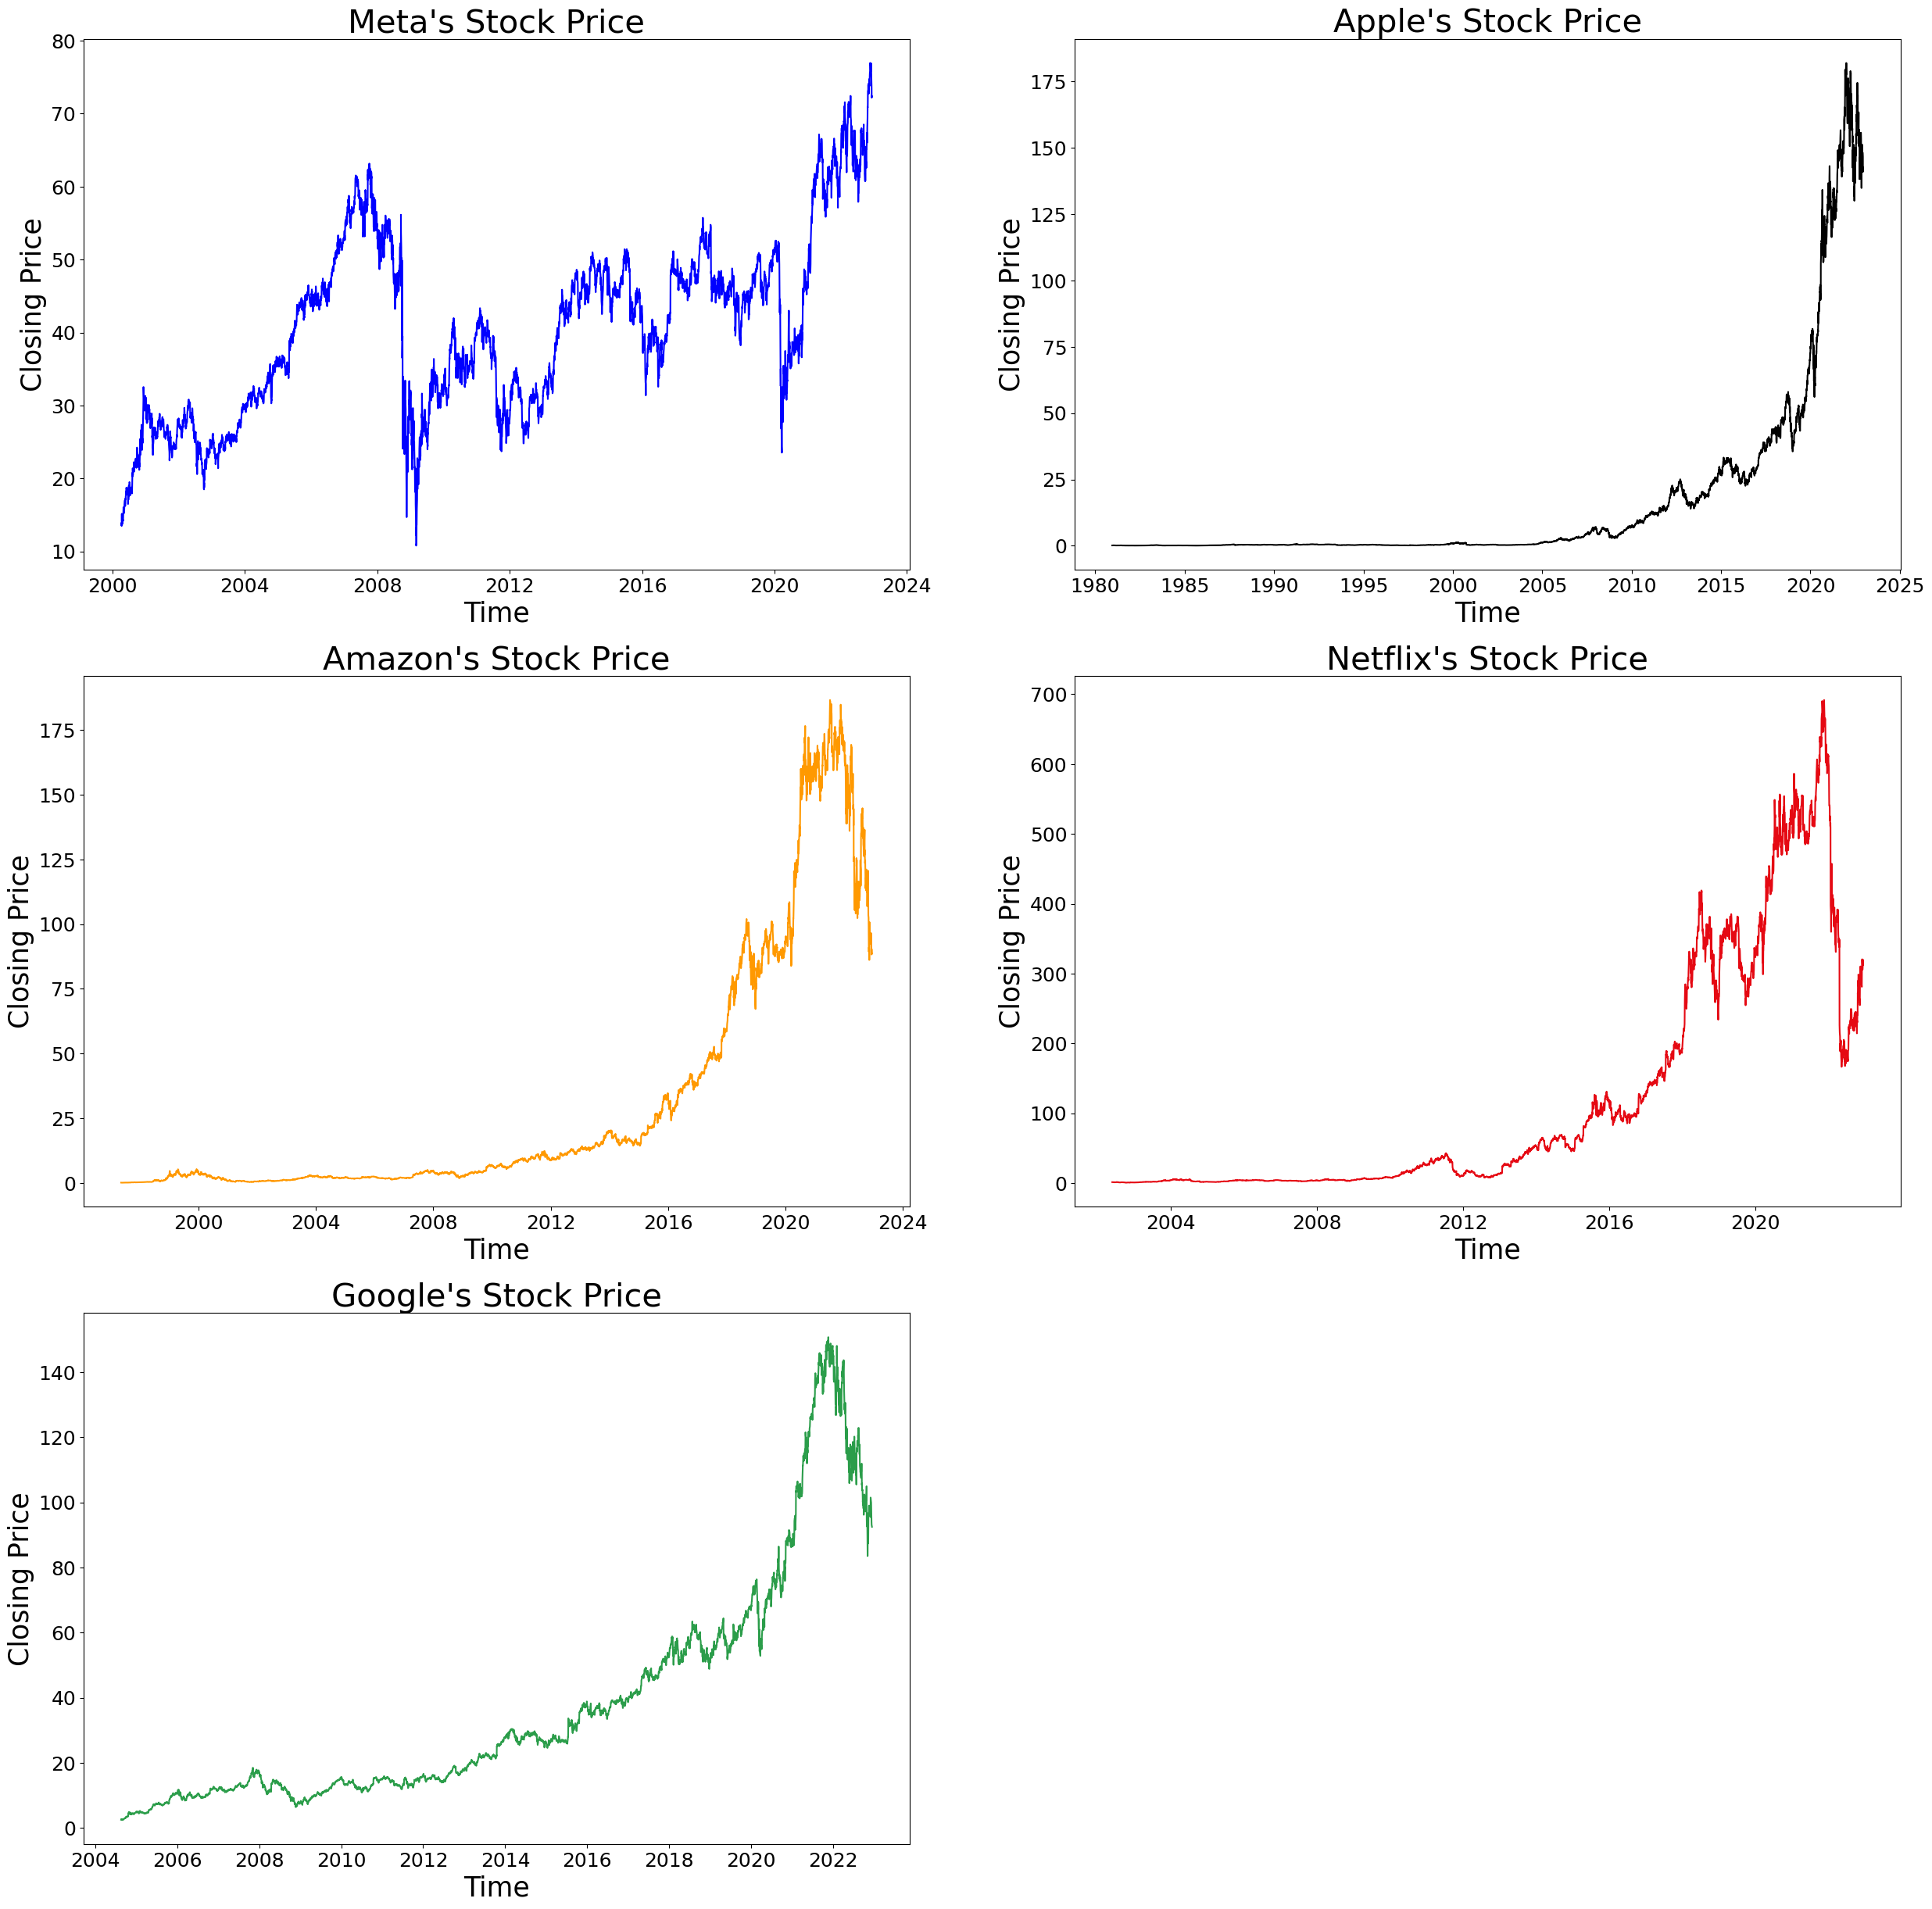

In [21]:
## Visualizing the FAANG Stock Price

def visualize_faang_stock_prices(df_meta, df_aapl, df_amzn, df_nflx, df_goog):
    # Setting the plot size
    fig, axes = plt.subplots(3, 2, figsize=(30, 30))

    # Remove the last empty subplot
    fig.delaxes(axes[2][1])

    # Meta
    axes[0][0].set_facecolor('white')
    axes[0][0].plot(df_meta['Date'], df_meta['Close'], color='blue')
    axes[0][0].set_title("Meta's Stock Price", fontsize=30)

    # Apple
    axes[0][1].set_facecolor('white')
    axes[0][1].plot(df_aapl['Date'], df_aapl['Close'], color='black')
    axes[0][1].set_title("Apple's Stock Price", fontsize=30)

    # Amazon
    axes[1][0].set_facecolor('white')
    axes[1][0].plot(df_amzn['Date'], df_amzn['Close'], color='#FF9900')
    axes[1][0].set_title("Amazon's Stock Price", fontsize=30)

    # Netflix
    axes[1][1].set_facecolor('white')
    axes[1][1].plot(df_nflx['Date'], df_nflx['Close'], color='#E50913')
    axes[1][1].set_title("Netflix's Stock Price", fontsize=30)

    # Google
    axes[2][0].set_facecolor('white')
    axes[2][0].plot(df_goog['Date'], df_goog['Close'], color='#2B9D4A')
    axes[2][0].set_title("Google's Stock Price", fontsize=30)

    # Set common labels
    for ax in axes.flat:
        ax.set_xlabel('Time', fontsize=25)
        ax.set_ylabel('Closing Price', fontsize=25)
        ax.xaxis.set_tick_params(labelsize=18)
        ax.yaxis.set_tick_params(labelsize=18)
    plt.savefig("closing.png")
    plt.show()

# Call the function
visualize_faang_stock_prices(df_meta, df_aapl, df_amzn, df_nflx, df_goog)


As we can observe from the graphs the closing price of all the stocks has reduced significantly from 2020 to 2022.
All the stock prices were increasing from 2016 to 2020. This can be attributed to the COVID-19 pandemic that led to a stock market crash. Meta's stock price have been following a fluctuating trend since the 2000's whereas all other companies have been following a same trend.

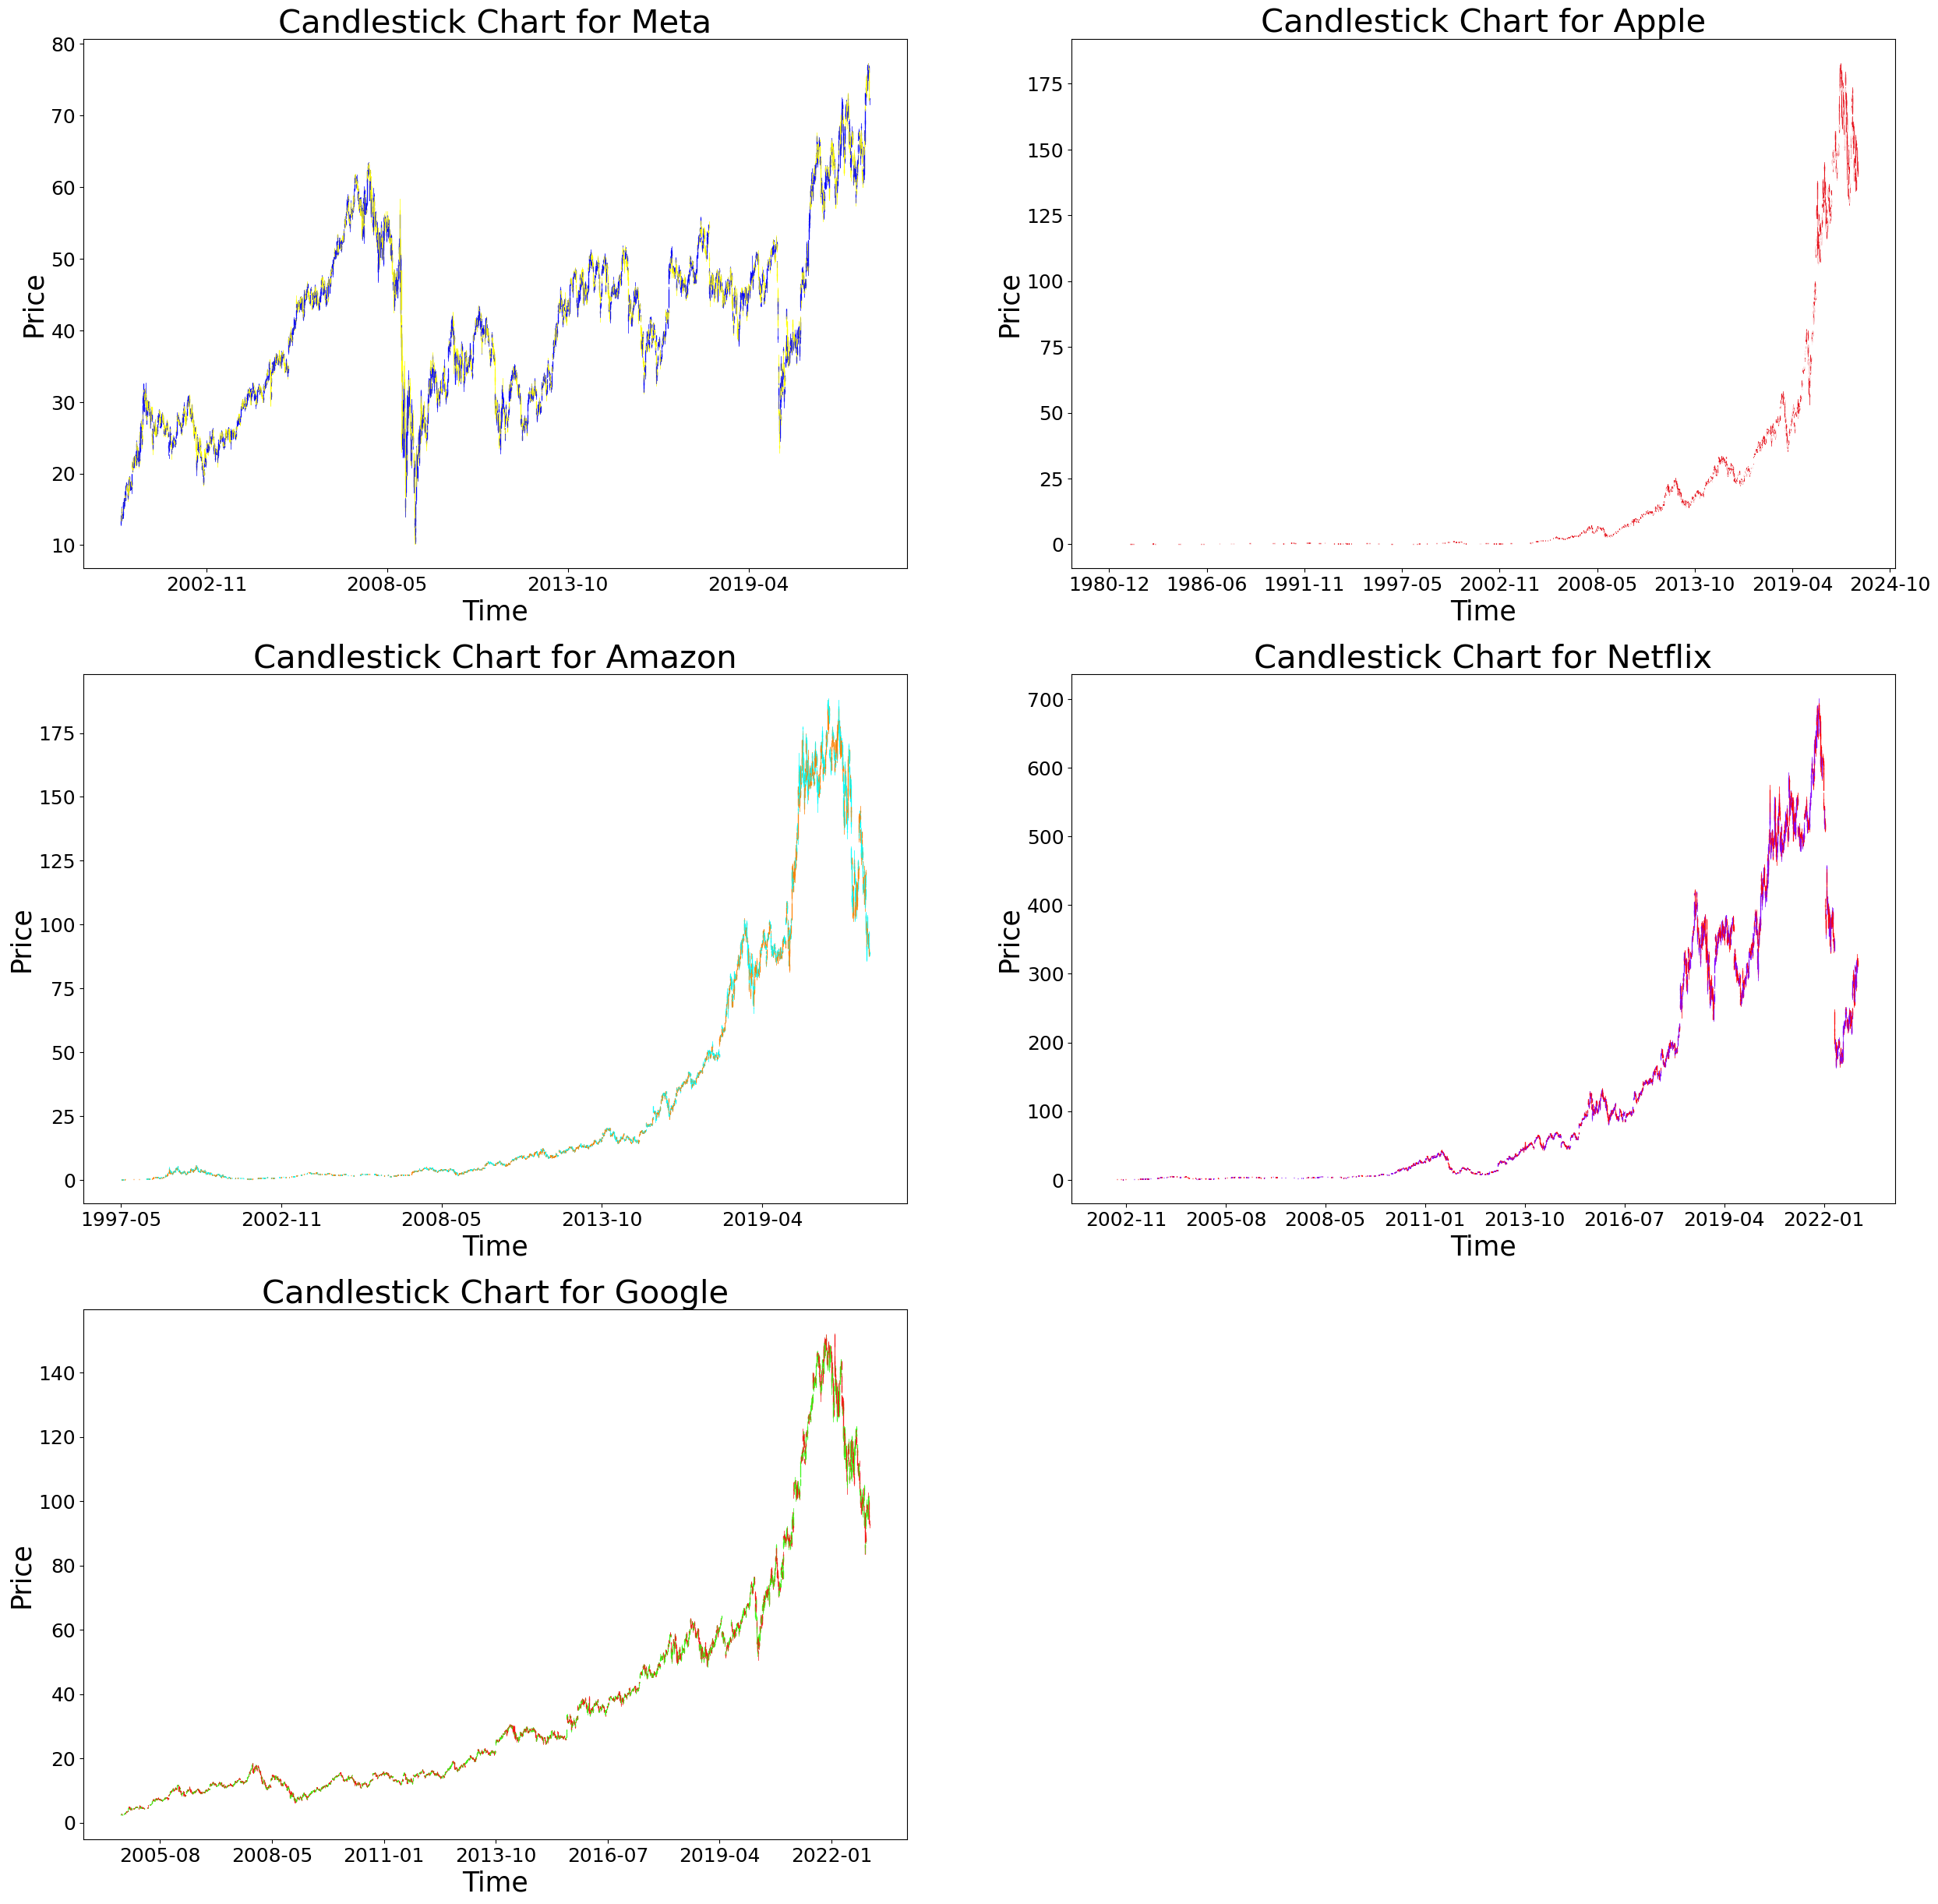

In [23]:
# Plot the candlestick chart for FAANG stock price
def visualize_faang_candlestick_charts(df_meta, df_aapl, df_amzn, df_nflx, df_goog):

    candlestick_chart_data = ['Date', 'Open', 'High', 'Low', 'Close']
# Subset the data only for the above columns
    new_meta_df = df_meta[candlestick_chart_data].copy()
    new_aapl_df = df_aapl[candlestick_chart_data].copy()
    new_amzn_df = df_amzn[candlestick_chart_data].copy()
    new_nflx_df = df_nflx[candlestick_chart_data].copy()
    new_goog_df = df_goog[candlestick_chart_data].copy()

    new_meta_df['Date'] = new_meta_df['Date'].map(mpdates.date2num)
    new_aapl_df['Date'] = new_aapl_df['Date'].map(mpdates.date2num)
    new_amzn_df['Date'] = new_amzn_df['Date'].map(mpdates.date2num)
    new_nflx_df['Date'] = new_nflx_df['Date'].map(mpdates.date2num)
    new_goog_df['Date'] = new_goog_df['Date'].map(mpdates.date2num)

    fig, axes = plt.subplots(3, 2, figsize = (30, 30))
    axes[2][1].set_visible(False)
# Plot the data
# Meta
    axes[0][0].set_facecolor('white')
    date_format = mpdates.DateFormatter('%Y-%m')
    axes[0][0].xaxis.set_major_formatter(date_format)
    candlestick_ohlc(axes[0][0], new_meta_df.values, colorup = '#0000FF', colordown = '#FFFF00', alpha = 0.8)
    axes[0][0].set_title('Candlestick Chart for Meta', fontsize = 30)
    axes[0][0].set_xlabel('Time', fontsize = 25)
    axes[0][0].set_ylabel('Price', fontsize = 25)
    axes[0][0].xaxis.set_tick_params(labelsize = 18)
    axes[0][0].yaxis.set_tick_params(labelsize = 18)
# Apple
    axes[0][1].set_facecolor('white')
    date_format = mpdates.DateFormatter('%Y-%m')
    axes[0][1].xaxis.set_major_formatter(date_format)
    candlestick_ohlc(axes[0][1], new_aapl_df.values, colorup = '#FFFFFF', colordown = '#E50913', alpha = 0.8)
    axes[0][1].set_title('Candlestick Chart for Apple', fontsize = 30)
    axes[0][1].set_xlabel('Time', fontsize = 25)
    axes[0][1].set_ylabel('Price', fontsize = 25)
    axes[0][1].xaxis.set_tick_params(labelsize = 18)
    axes[0][1].yaxis.set_tick_params(labelsize = 18)
# Amazon
    axes[1][0].set_facecolor('white')
    date_format = mpdates.DateFormatter('%Y-%m')
    axes[1][0].xaxis.set_major_formatter(date_format)
    candlestick_ohlc(axes[1][0], new_amzn_df.values, colorup = '#FF8000', colordown = '#01FFFF', alpha = 0.8)
    axes[1][0].set_title('Candlestick Chart for Amazon', fontsize = 30)
    axes[1][0].set_xlabel('Time', fontsize = 25)
    axes[1][0].set_ylabel('Price', fontsize = 25)
    axes[1][0].xaxis.set_tick_params(labelsize = 18)
    axes[1][0].yaxis.set_tick_params(labelsize = 18)
# Netflix
    axes[1][1].set_facecolor('white')
    date_format = mpdates.DateFormatter('%Y-%m')
    axes[1][1].xaxis.set_major_formatter(date_format)
    candlestick_ohlc(axes[1][1], new_nflx_df.values, colorup = '#8000FF', colordown = '#FF0000', alpha = 0.8)
    axes[1][1].set_title('Candlestick Chart for Netflix', fontsize = 30)
    axes[1][1].set_xlabel('Time', fontsize = 25)
    axes[1][1].set_ylabel('Price', fontsize = 25)
    axes[1][1].xaxis.set_tick_params(labelsize = 18)
    axes[1][1].yaxis.set_tick_params(labelsize = 18)
# Google
    axes[2][0].set_facecolor('white')
    date_format = mpdates.DateFormatter('%Y-%m')
    axes[2][0].xaxis.set_major_formatter(date_format)
    candlestick_ohlc(axes[2][0], new_goog_df.values, colorup = '#37F713', colordown = '#F71111', alpha = 0.8)
    axes[2][0].set_title('Candlestick Chart for Google', fontsize = 30)
    axes[2][0].set_xlabel('Time', fontsize = 25)
    axes[2][0].set_ylabel('Price', fontsize = 25)
    axes[2][0].xaxis.set_tick_params(labelsize = 18)
    axes[2][0].yaxis.set_tick_params(labelsize = 18)
    plt.savefig("candle.png")
    plt.show()

visualize_faang_candlestick_charts(df_meta, df_aapl, df_amzn, df_nflx, df_goog)

An OHLC (Open High Low Close) chart is a financial chart used to visualize price movements of stocks, commodities, or other financial instruments over a period of time. It consists of four key price points for each time interval:

Open (O): The price at which the stock or asset started trading during that time period.
High (H): The highest price reached during that period.
Low (L): The lowest price reached during that period.
Close (C): The final price at the end of the time period.
Each data point on an OHLC chart is represented by a vertical line (showing the high and low prices) and small horizontal ticks (showing the open and close prices).
If the closing price is higher than the opening price, it is usually represented in green (indicating a gain).
If the closing price is lower than the opening price, it is often red (indicating a loss).

While a Closing Prices graph only shows the final price for each time period, an OHLC chart gives a more complete picture of market volatility by showing price fluctuations throughout the trading session.

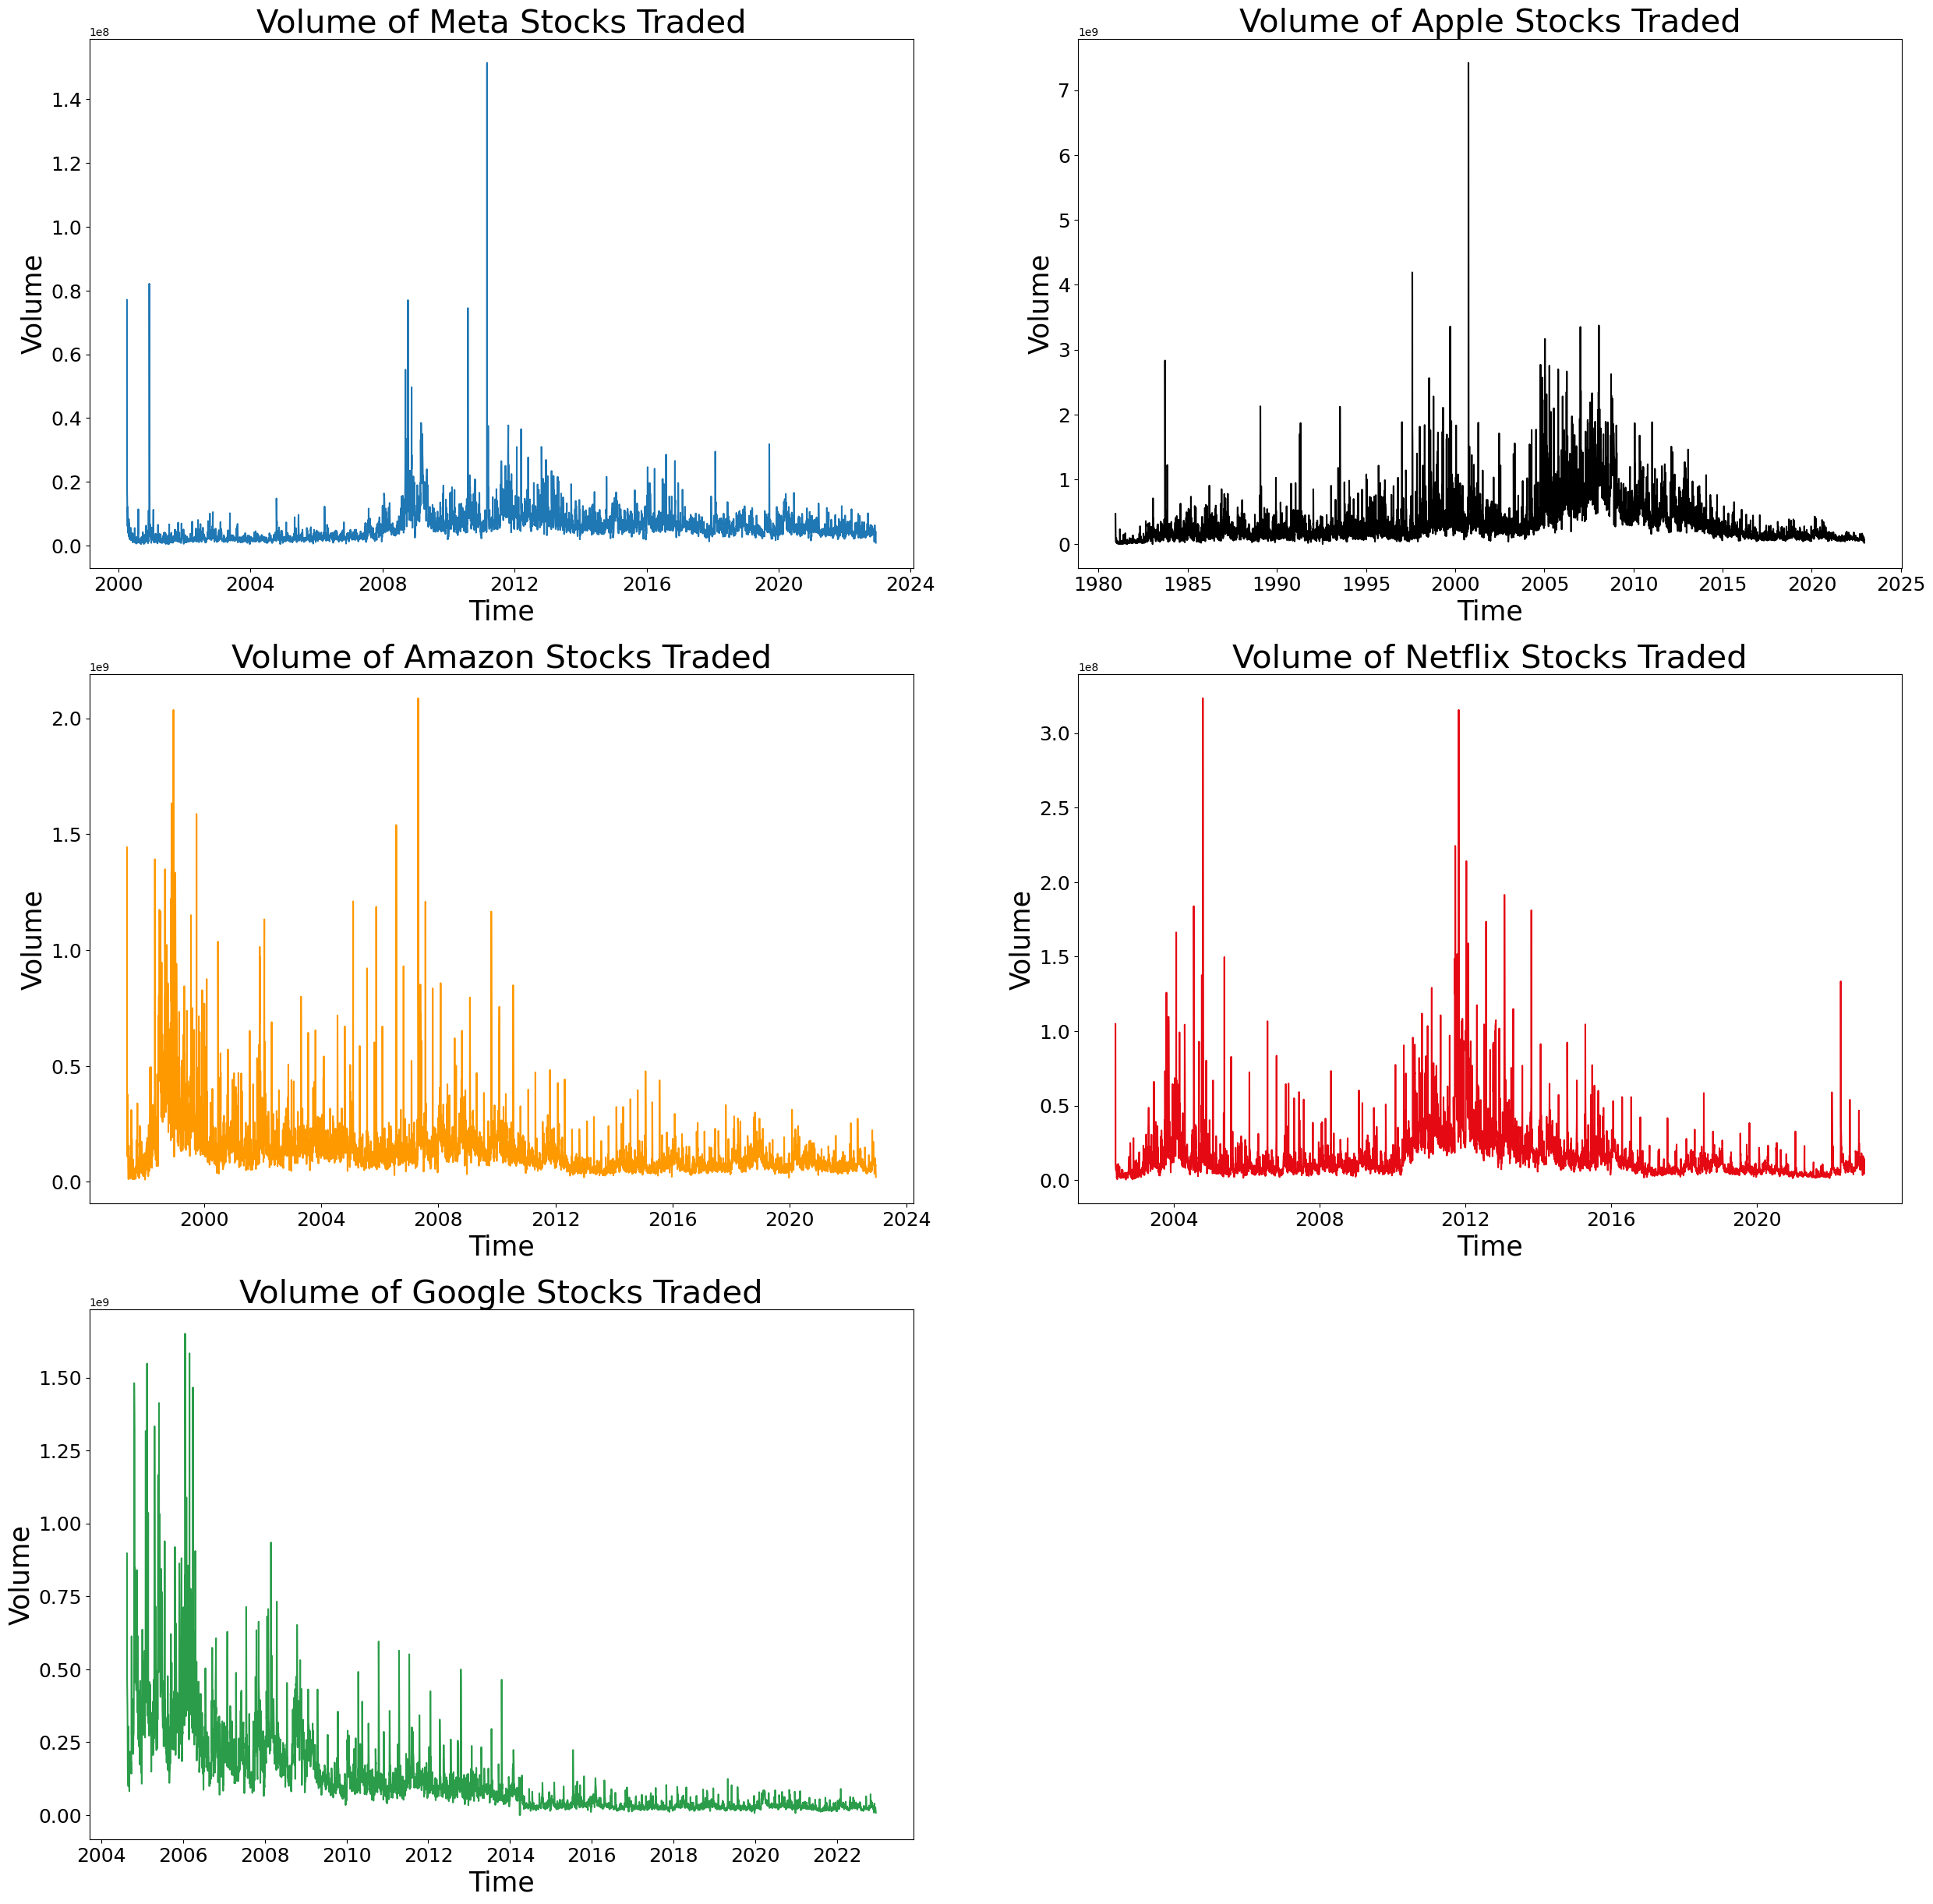

In [25]:
#Visualise the stock volume for FAANG
def visualize_faang_stock_volume(df_meta, df_aapl, df_amzn, df_nflx, df_goog):

    fig, axes = plt.subplots(3, 2, figsize = (30, 30))
    axes[2][1].set_visible(False)
# Meta
    axes[0][0].set_facecolor('white')
    axes[0][0].plot(df_meta['Date'], df_meta['Volume'])
    axes[0][0].set_title("Volume of Meta Stocks Traded", fontsize = 30)
    axes[0][0].set_xlabel('Time', fontsize = 25)
    axes[0][0].set_ylabel('Volume', fontsize = 25)
    axes[0][0].xaxis.set_tick_params(labelsize = 18)
    axes[0][0].yaxis.set_tick_params(labelsize = 18)
# Apple
    axes[0][1].set_facecolor('white')
    axes[0][1].plot(df_aapl['Date'], df_aapl['Volume'], color = 'Black')
    axes[0][1].set_title("Volume of Apple Stocks Traded", fontsize = 30)
    axes[0][1].set_xlabel('Time', fontsize = 25)
    axes[0][1].set_ylabel('Volume', fontsize = 25)
    axes[0][1].xaxis.set_tick_params(labelsize = 18)
    axes[0][1].yaxis.set_tick_params(labelsize = 18)
# Amazon
    axes[1][0].set_facecolor('white')
    axes[1][0].plot(df_amzn['Date'], df_amzn['Volume'], color = '#FF9900')
    axes[1][0].set_title("Volume of Amazon Stocks Traded", fontsize = 30)
    axes[1][0].set_xlabel('Time', fontsize = 25)
    axes[1][0].set_ylabel('Volume', fontsize = 25)
    axes[1][0].xaxis.set_tick_params(labelsize = 18)
    axes[1][0].yaxis.set_tick_params(labelsize = 18)
# Netflix
    axes[1][1].set_facecolor('white')
    axes[1][1].plot(df_nflx['Date'], df_nflx['Volume'], color = '#E50913')
    axes[1][1].set_title("Volume of Netflix Stocks Traded", fontsize = 30)
    axes[1][1].set_xlabel('Time', fontsize = 25)
    axes[1][1].set_ylabel('Volume', fontsize = 25)
    axes[1][1].xaxis.set_tick_params(labelsize = 18)
    axes[1][1].yaxis.set_tick_params(labelsize = 18)
# Google
    axes[2][0].set_facecolor('white')
    axes[2][0].plot(df_goog['Date'], df_goog['Volume'], color = '#2B9D4A')
    axes[2][0].set_title("Volume of Google Stocks Traded", fontsize = 30)
    axes[2][0].set_xlabel('Time', fontsize = 25)
    axes[2][0].set_ylabel('Volume', fontsize = 25)
    axes[2][0].xaxis.set_tick_params(labelsize = 18)
    axes[2][0].yaxis.set_tick_params(labelsize = 18)
    plt.savefig("volume.png")
    plt.show()


visualize_faang_stock_volume(df_meta, df_aapl, df_amzn, df_nflx, df_goog)

Volume of a stock measures the number of shares traded for that stock.There is no particularly observable trend when it comes to the volume of the stock. For some companies such as Meta and Google we can observe that the volume of the stock being traded when the company was listed is higher than the volume being traded at present. This is because of the increase in the stock price over time.




#### **Stock-Specific Trends**  

**Meta (META)**  
   - Strong growth until 2021, followed by a **sharp decline in 2022** due to reduced ad spending.  
   - Transition to **metaverse investments** led to uncertainty among investors.  

**Apple (AAPL)**  
   - More **stable** compared to other FAANG stocks.  
   - **Supply chain disruptions** in 2021 affected stock performance.  
   - The decline in **2022** was less severe due to strong **hardware sales (iPhones, MacBooks)**.  

**Amazon (AMZN)**  
   - A strong **pandemic boom**, peaking in mid-2021.  
   - **Post-pandemic e-commerce slowdown** led to a sharp decline in 2022.  
   - Rising operational costs and economic slowdown hurt stock prices.  

**Netflix (NFLX)**  
   - **Massive growth in 2020–2021**, but **steep fall in 2022** due to declining subscriber numbers.  
   - **Increased competition** from Disney+, HBO Max, and other platforms.  

**Google (GOOGL)**  
   - Showed **steady growth** during the pandemic.  
   - **Ad revenue struggles** in 2022 caused a pullback in stock price.  
   - Cloud business remained a strong point.  

#### Market Sentiment
**2022: Market correction due to inflation, interest rate hikes, and slowing tech growth.**  
**Amazon, Netflix, and Meta faced the biggest declines, while Apple and Google were more stable.**  



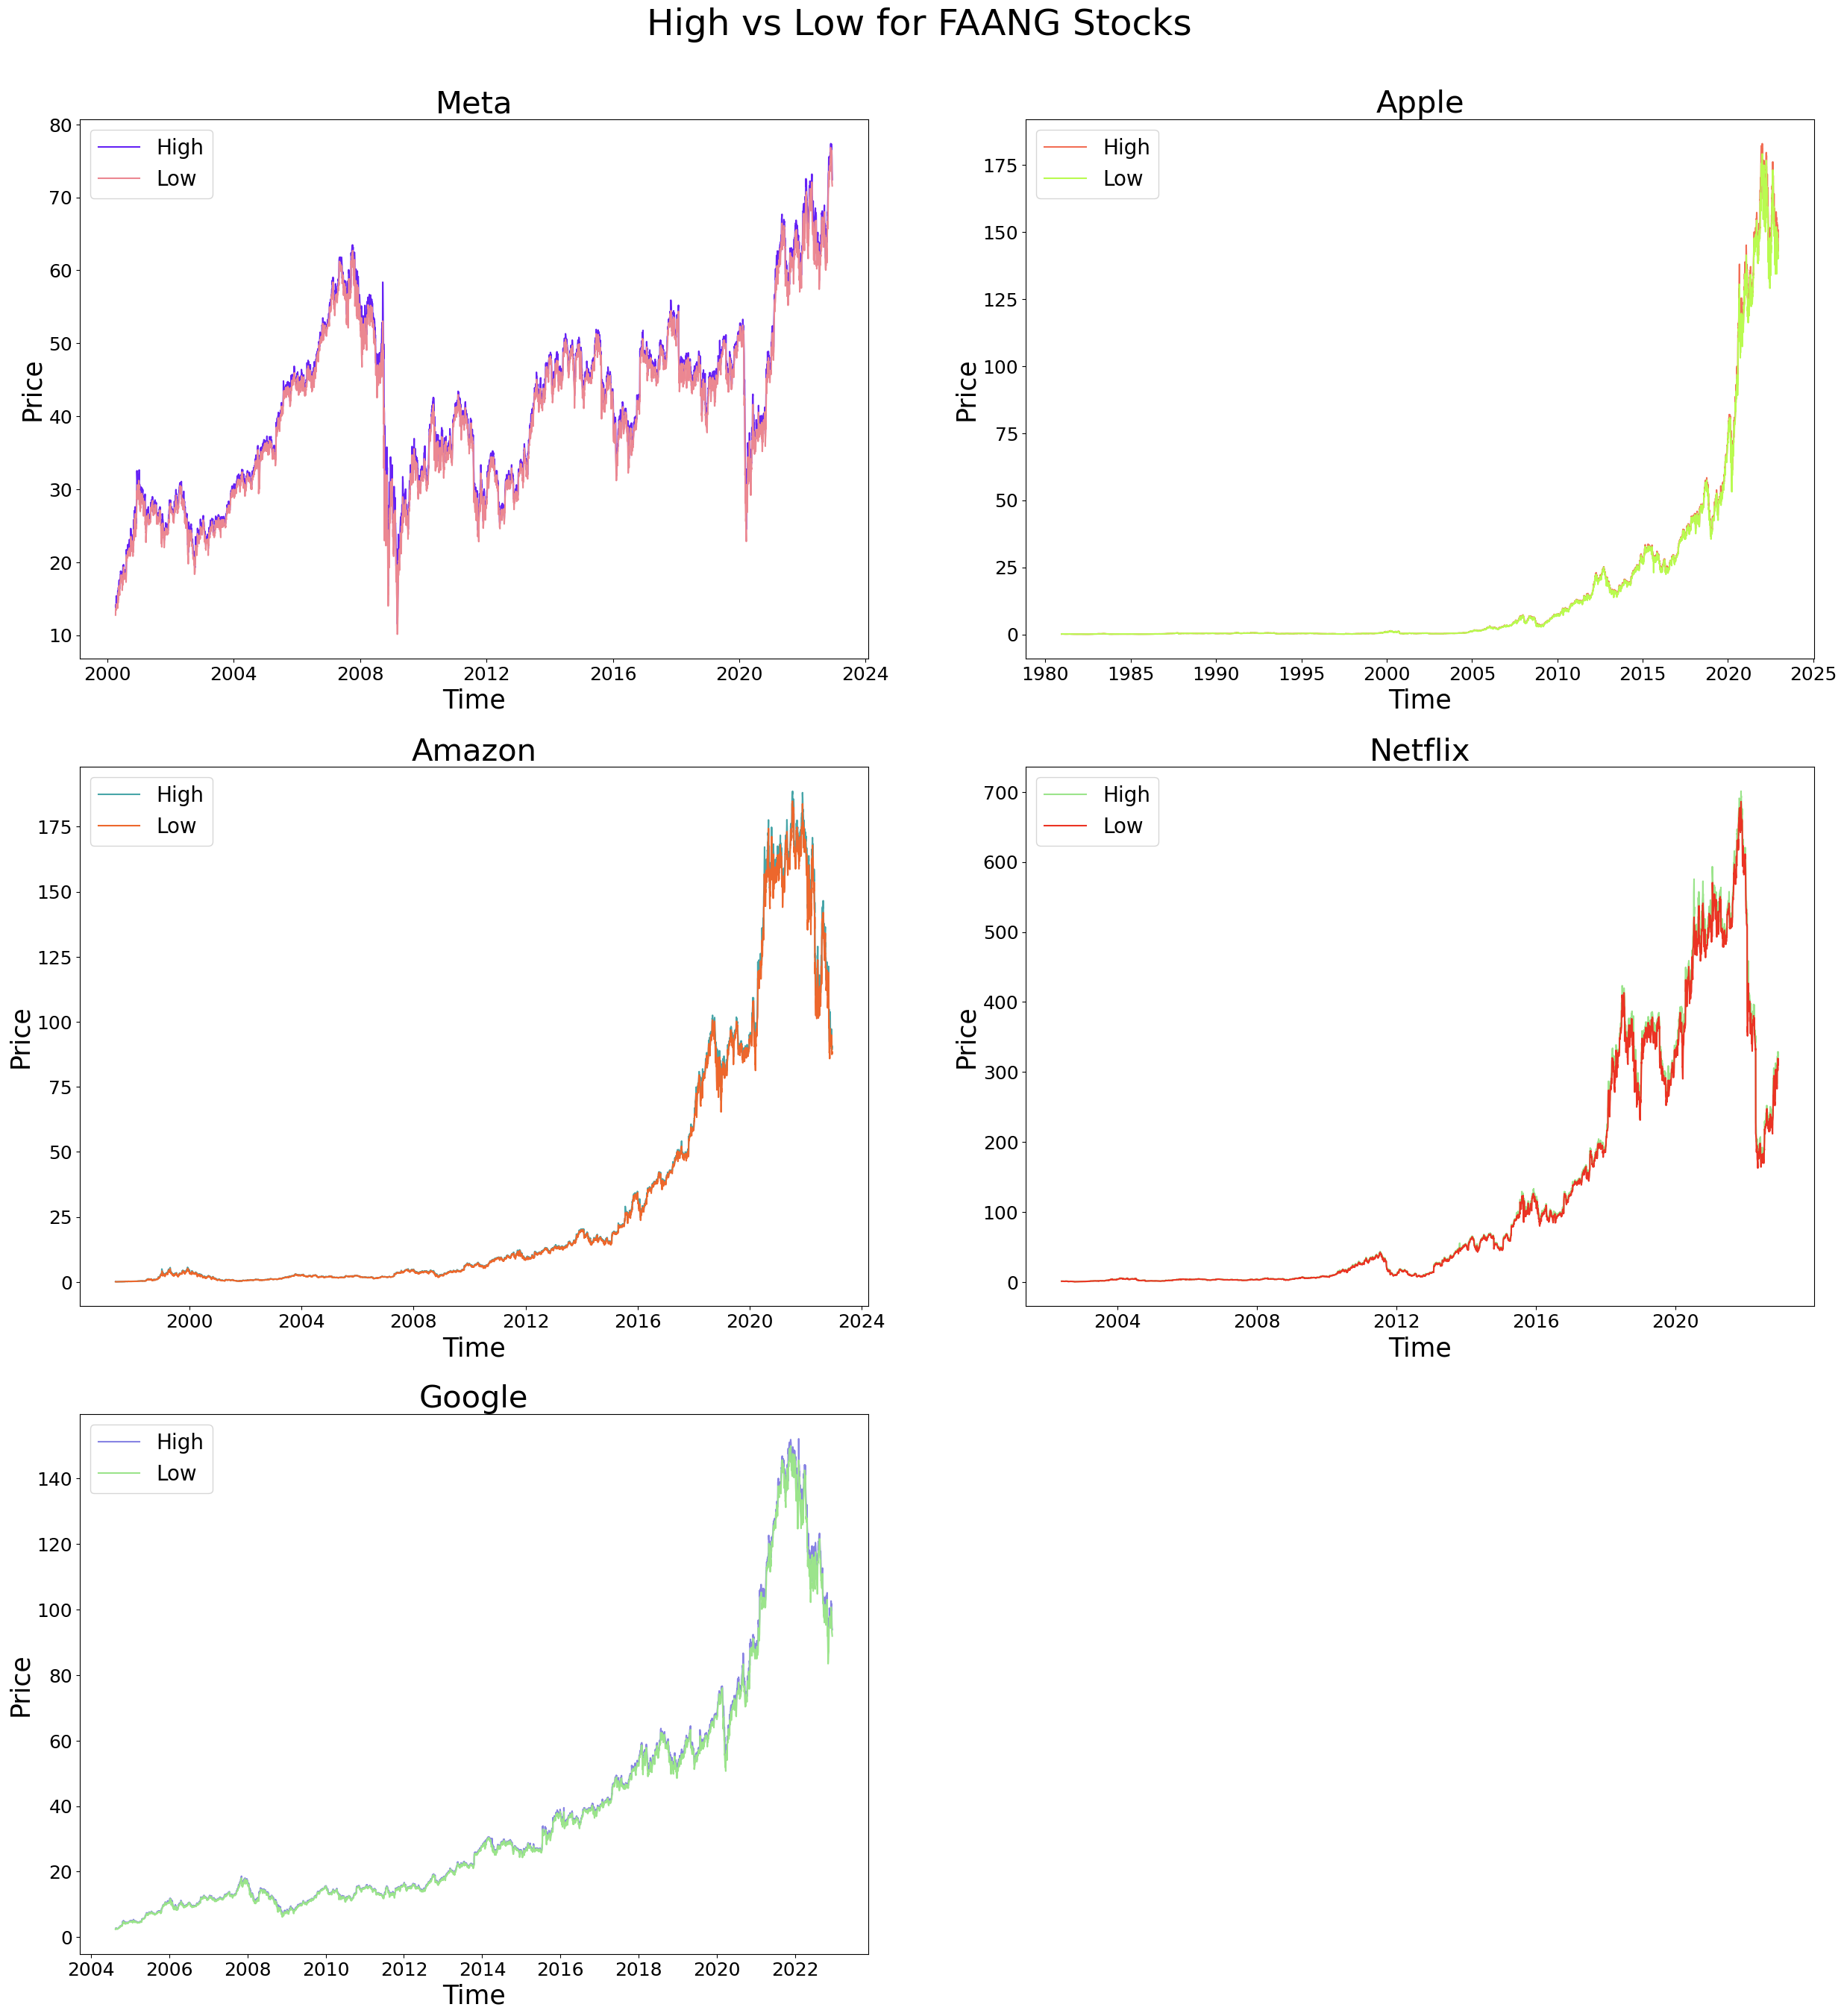

In [27]:
#Visualising the stock price high vs low for FAANG
def visualize_faang_two_features_over_time_graph(df_meta, df_aapl, df_amzn, df_nflx, df_goog, time, feature1, feature2):

    fig, axes = plt.subplots(3, 2, figsize = (30, 30))
    axes[2][1].set_visible(False)

    plt.suptitle(feature1 + ' vs ' + feature2 + ' for FAANG Stocks', verticalalignment = 'top', horizontalalignment = 'center', fontsize = 35)
# Meta
    axes[0][0].set_facecolor('white')
    axes[0][0].plot(df_meta[time], df_meta[feature1], color = '#6522F5', label = feature1)
    axes[0][0].plot(df_meta[time], df_meta[feature2], color = '#EB8791', label = feature2)
    axes[0][0].set_title('Meta', fontsize = 30)
    axes[0][0].set_xlabel('Time', fontsize = 25)
    axes[0][0].set_ylabel('Price', fontsize = 25)
    axes[0][0].xaxis.set_tick_params(labelsize = 18)
    axes[0][0].yaxis.set_tick_params(labelsize = 18)
    axes[0][0].legend(loc = 'upper left', fontsize = 20)
# Apple
    axes[0][1].set_facecolor('white')
    axes[0][1].plot(df_aapl[time], df_aapl[feature1], color = '#F26E55', label = feature1)
    axes[0][1].plot(df_aapl[time], df_aapl[feature2], color = '#B9FB50', label = feature2)
    axes[0][1].set_title('Apple', fontsize = 30)
    axes[0][1].set_xlabel('Time', fontsize = 25)
    axes[0][1].set_ylabel('Price', fontsize = 25)
    axes[0][1].xaxis.set_tick_params(labelsize = 18)
    axes[0][1].yaxis.set_tick_params(labelsize = 18)
    axes[0][1].legend(loc = 'upper left', fontsize = 20)
# Amazon
    axes[1][0].set_facecolor('white')
    axes[1][0].plot(df_amzn[time], df_amzn[feature1], color = '#47A5A8', label = feature1)
    axes[1][0].plot(df_amzn[time], df_amzn[feature2], color = '#ED672C', label = feature2)
    axes[1][0].set_title('Amazon', fontsize = 30)
    axes[1][0].set_xlabel('Time', fontsize = 25)
    axes[1][0].set_ylabel('Price', fontsize = 25)
    axes[1][0].xaxis.set_tick_params(labelsize = 18)
    axes[1][0].yaxis.set_tick_params(labelsize = 18)
    axes[1][0].legend(loc = 'upper left', fontsize = 20)
# Netflix
    axes[1][1].set_facecolor('white')
    axes[1][1].plot(df_nflx[time], df_nflx[feature1], color = '#9BE48B', label = feature1)
    axes[1][1].plot(df_nflx[time], df_nflx[feature2], color = '#EB3323', label = feature2)
    axes[1][1].set_title('Netflix', fontsize = 30)
    axes[1][1].set_xlabel('Time', fontsize = 25)
    axes[1][1].set_ylabel('Price', fontsize = 25)
    axes[1][1].xaxis.set_tick_params(labelsize = 18)
    axes[1][1].yaxis.set_tick_params(labelsize = 18)
    axes[1][1].legend(loc = 'upper left', fontsize = 20)
# Google
    axes[2][0].set_facecolor('white')
    axes[2][0].plot(df_goog[time], df_goog[feature1], color = '#8783E3', label = feature1)
    axes[2][0].plot(df_goog[time], df_goog[feature2], color = '#9BE48B', label = feature2)
    axes[2][0].set_title('Google', fontsize = 30)
    axes[2][0].set_xlabel('Time', fontsize = 25)
    axes[2][0].set_ylabel('Price', fontsize = 25)
    axes[2][0].xaxis.set_tick_params(labelsize = 18)
    axes[2][0].yaxis.set_tick_params(labelsize = 18)
    axes[2][0].legend(loc = 'upper left', fontsize = 20)

    plt.subplots_adjust(top = 0.93)
    plt.savefig("highlow.png")
    plt.show()

visualize_faang_two_features_over_time_graph(df_meta, df_aapl, df_amzn, df_nflx, df_goog, 'Date', 'High', 'Low')

The high is the highest price at which a stock is traded during a period. The low is the lowest price of that same period. A stock's high and low points for the day are often called its intraday high and low. The High and Low of the stocks almost overlap each other, indicating that the range of Highs and Lows for the day was about the same. There are a few exceptions with an increasingly large value of High as compared to the Low. These could be indicators of a bullish market.

In OHLC charts, the High and Low are represented as the top and bottom points of the vertical lines, indicating the range of prices during that period. The Open and Close are shown as horizontal lines extending from the vertical line.

- Overlapping Highs and Lows:
When the High and Low points are very close to each other, it suggests that the stock price fluctuated within a relatively small range throughout the day (or the selected period). This often happens in a neutral or sideways market, where neither buying nor selling pressure is dominant.
This could indicate low volatility, where the market is indecisive, and the stock isn't experiencing significant price swings.
- Exceptions (High > Low Spread):
If you notice that the High and Low points are significantly different (especially if the High is much greater than the Low), this could be indicative of strong bullish sentiment.
- Bullish Market Signals:
Large Difference: A larger gap between the High and Low suggests that the stock is experiencing larger intraday fluctuations. This could signal that there’s strong buying momentum, causing the price to surge towards higher levels, while the Low remains elevated, suggesting resistance to price declines.
Sustained Bullishness: If this pattern continues over several periods, it could signal the presence of strong upward pressure and market confidence.

Conclusion:
Narrow Range (Overlapping High/Low): Neutral market with low volatility.
Wide Range (High much larger than Low): Indicative of a bullish market with increased buying activity.

### Calculate Moving Averages for FAANG Stocks

In [29]:
#Subset the data into the below columns
candlestick_chart_data = ['Date', 'Open', 'High', 'Low', 'Close']
new_meta_df = df_meta[candlestick_chart_data]
new_aapl_df = df_aapl[candlestick_chart_data]
new_amzn_df = df_amzn[candlestick_chart_data]
new_nflx_df = df_nflx[candlestick_chart_data]
new_goog_df = df_goog[candlestick_chart_data]

# Function to create moving average of 10,50 and 100 days
def create_moving_averages_columns(company_data):
    days_for_moving_averages = [10, 50, 100]

    for moving_averages in days_for_moving_averages:
        column = f'MA for {moving_averages} days'
        company_data[column] = company_data['Close'].rolling(moving_averages).mean()

    return company_data
#Save the moving average into a new dataframe
new_meta_df = create_moving_averages_columns(new_meta_df)
new_aapl_df = create_moving_averages_columns(new_aapl_df)
new_amzn_df = create_moving_averages_columns(new_amzn_df)
new_nflx_df = create_moving_averages_columns(new_nflx_df)
new_goog_df = create_moving_averages_columns(new_goog_df)

#Print the last 5 values for Meta dataframe
new_meta_df.tail(10)

Date       Open       High        Low      Close  MA for 10 days  \
5699 2022-11-29  75.680000  76.459999  75.300003  76.070000         75.7310   
5700 2022-11-30  75.500000  76.970001  74.889999  76.699997         75.9730   
5701 2022-12-01  77.019997  77.330002  76.480003  76.650002         76.2020   
5702 2022-12-02  76.059998  77.019997  76.059998  76.910004         76.4040   
5703 2022-12-05  76.389999  76.639999  74.940002  75.400002         76.3940   
5704 2022-12-06  75.379997  75.860001  74.769997  75.279999         76.3330   
5705 2022-12-07  74.820000  75.790001  74.410004  74.589996         76.1000   
5706 2022-12-08  75.199997  75.199997  73.440002  73.610001         75.7890   
5707 2022-12-09  73.089996  73.639999  72.089996  72.190002         75.3130   
5708 2022-12-12  72.260002  72.430000  71.570000  72.375000         74.9775   

      MA for 50 days  MA for 100 days  
5699         69.2068         66.74580  
5700         69.4310         66.89170  
5701         69.6736         67.04030  
5702         69.9424         67.20990  
5703         70.2132         67.38480  
5704         70.5016         67.54730  
5705         70.7782         67.70220  
5706         71.0132         67.83030  
5707         71.2356         67.93940  
5708         71.4675         68.05205

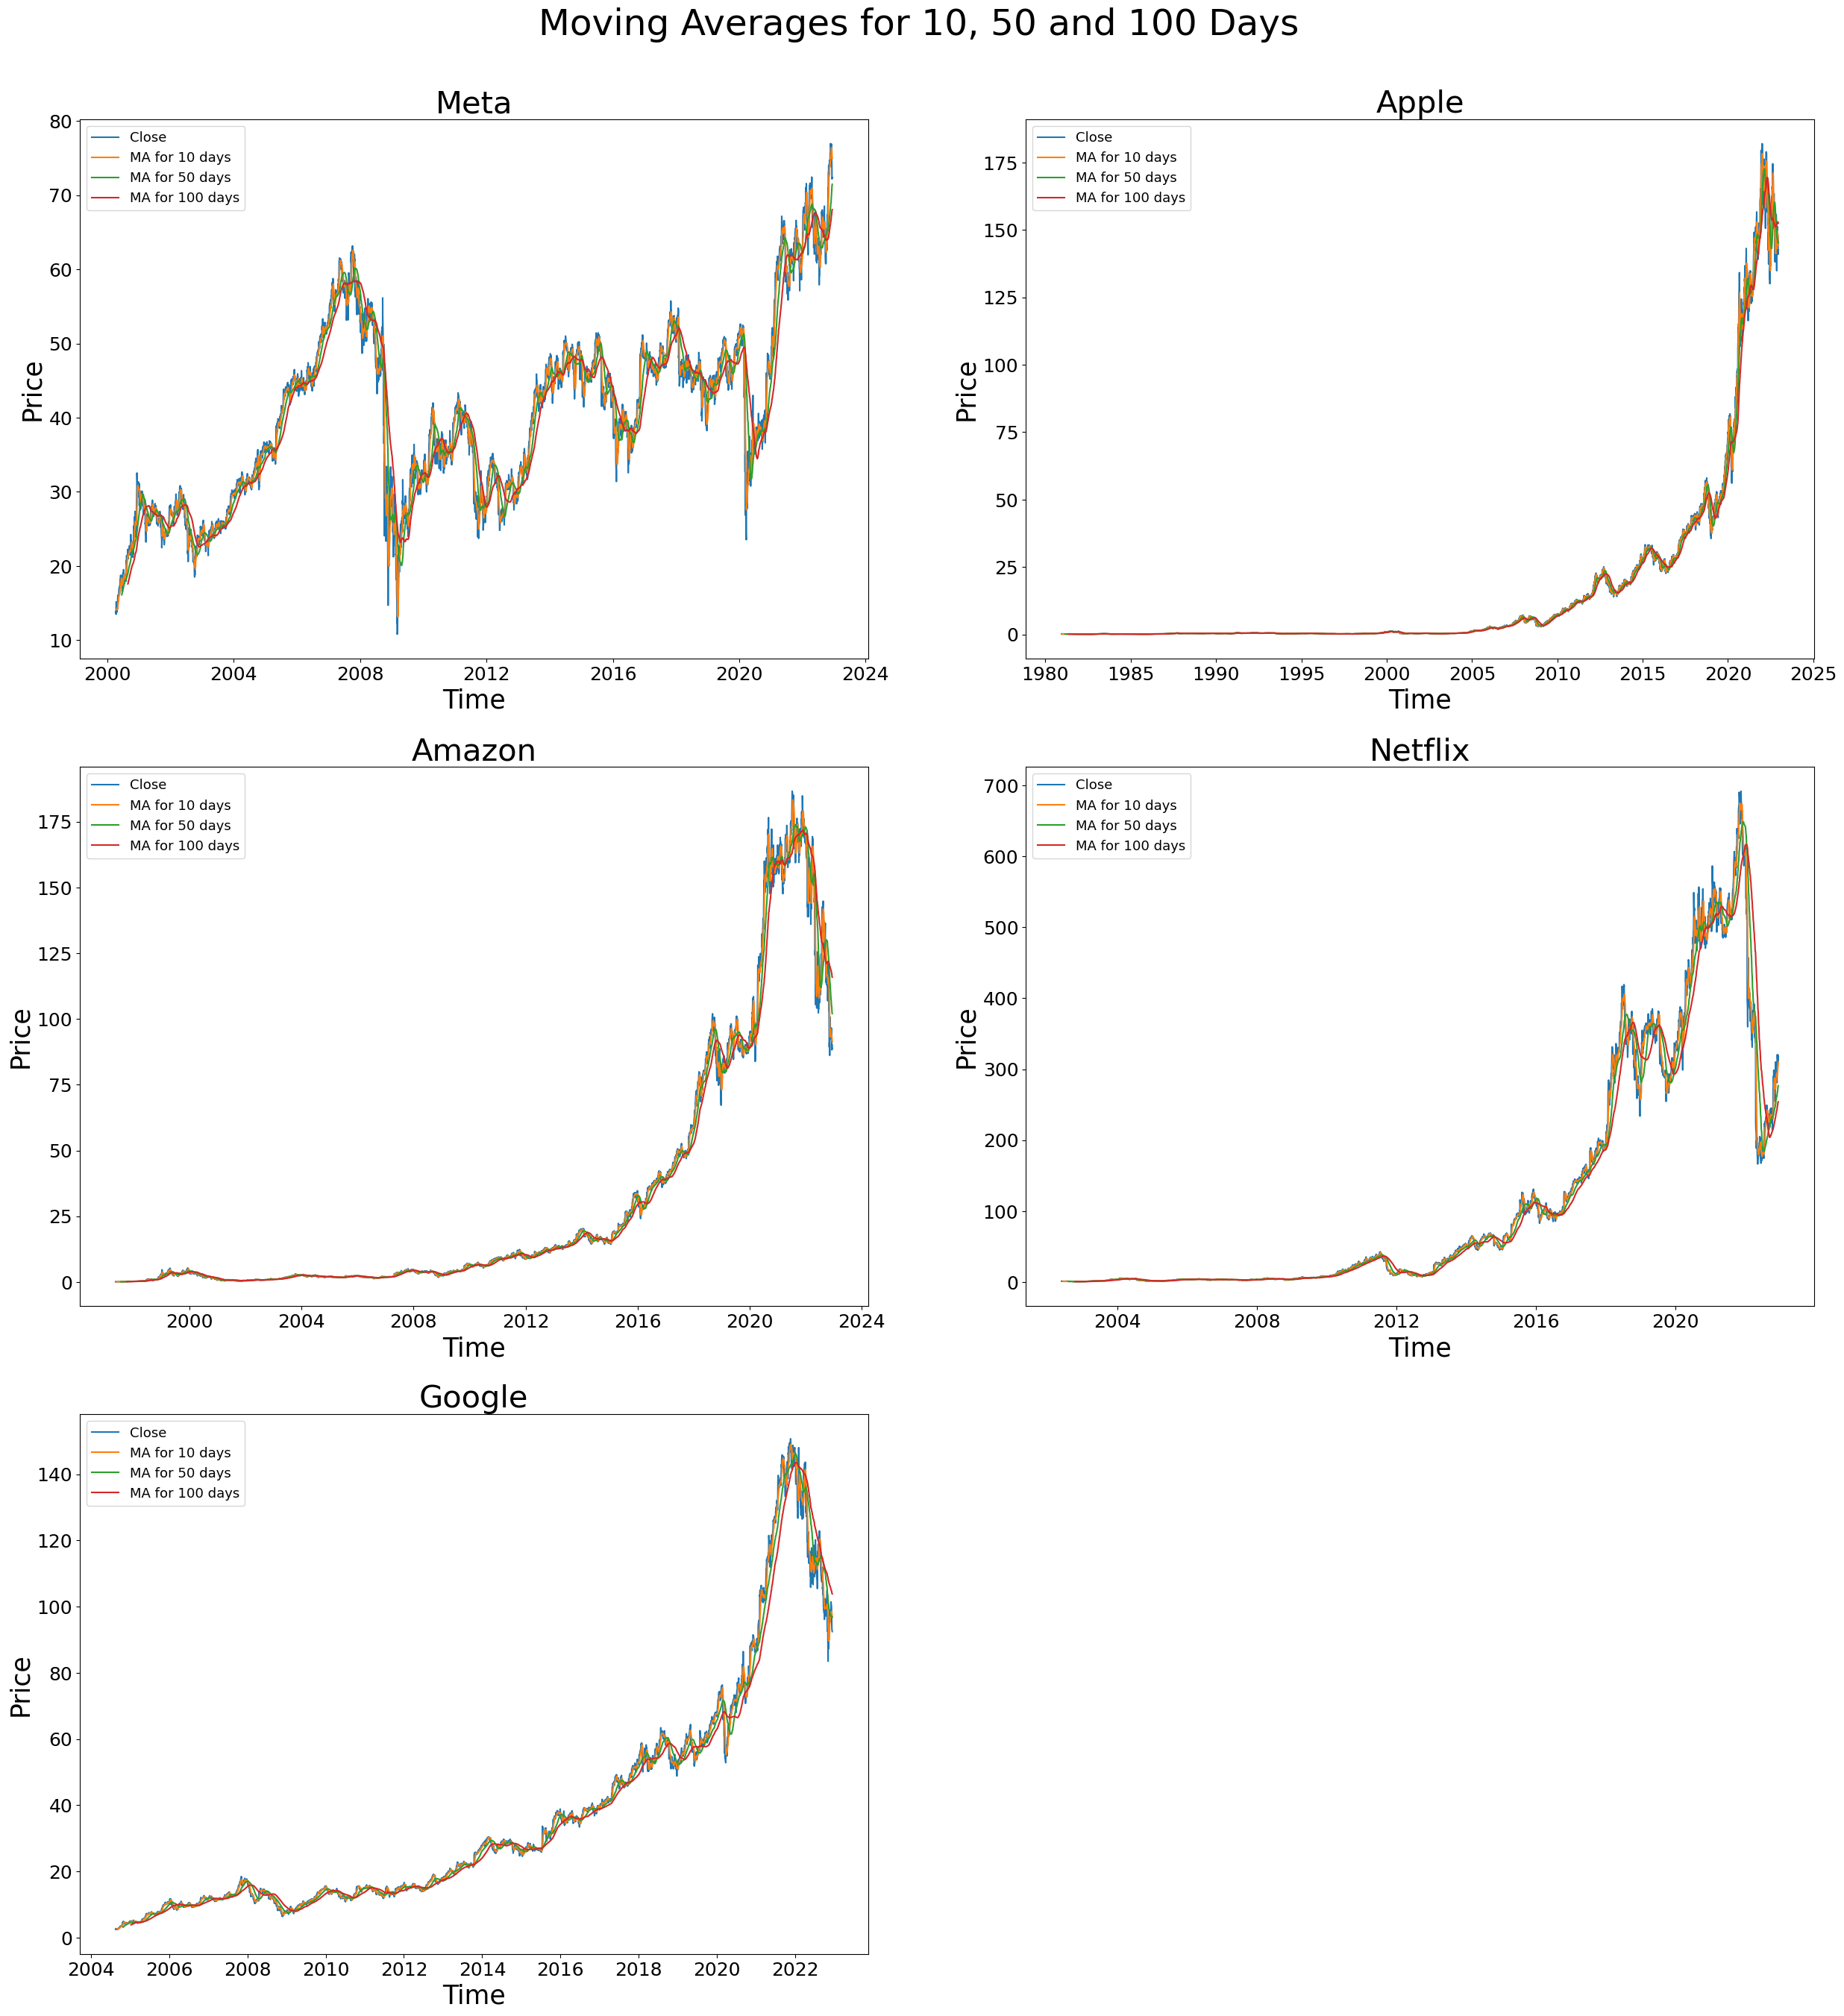

In [31]:
#Visualise the moving averages
def visualize_moving_averages(new_meta_df, new_aapl_df, new_amzn_df, new_nflx_df, new_goog_df, time, feature, ma1, ma2, ma3):

    fig, axes = plt.subplots(3, 2, figsize = (30, 30))
    axes[2][1].set_visible(False)

    plt.suptitle('Moving Averages for 10, 50 and 100 Days', verticalalignment = 'top', horizontalalignment = 'center', fontsize = 35)
# Meta
    axes[0][0].set_facecolor('white')
    axes[0][0].plot(new_meta_df[time], new_meta_df[feature], label = feature)
    axes[0][0].plot(new_meta_df[time], new_meta_df[ma1], label = ma1)
    axes[0][0].plot(new_meta_df[time], new_meta_df[ma2], label = ma2)
    axes[0][0].plot(new_meta_df[time], new_meta_df[ma3], label = ma3)
    axes[0][0].set_title('Meta', fontsize = 30)
    axes[0][0].set_xlabel('Time', fontsize = 25)
    axes[0][0].set_ylabel('Price', fontsize = 25)
    axes[0][0].xaxis.set_tick_params(labelsize = 18)
    axes[0][0].yaxis.set_tick_params(labelsize = 18)
    axes[0][0].legend(loc = 'upper left', fontsize = 13)
# Apple
    axes[0][1].set_facecolor('white')
    axes[0][1].plot(new_aapl_df[time], new_aapl_df[feature], label = feature)
    axes[0][1].plot(new_aapl_df[time], new_aapl_df[ma1], label = ma1)
    axes[0][1].plot(new_aapl_df[time], new_aapl_df[ma2], label = ma2)
    axes[0][1].plot(new_aapl_df[time], new_aapl_df[ma3], label = ma3)
    axes[0][1].set_title('Apple', fontsize = 30)
    axes[0][1].set_xlabel('Time', fontsize = 25)
    axes[0][1].set_ylabel('Price', fontsize = 25)
    axes[0][1].xaxis.set_tick_params(labelsize = 18)
    axes[0][1].yaxis.set_tick_params(labelsize = 18)
    axes[0][1].legend(loc = 'upper left', fontsize = 13)
# Amazon
    axes[1][0].set_facecolor('white')
    axes[1][0].plot(new_amzn_df[time], new_amzn_df[feature], label = feature)
    axes[1][0].plot(new_amzn_df[time], new_amzn_df[ma1], label = ma1)
    axes[1][0].plot(new_amzn_df[time], new_amzn_df[ma2], label = ma2)
    axes[1][0].plot(new_amzn_df[time], new_amzn_df[ma3], label = ma3)
    axes[1][0].set_title('Amazon', fontsize = 30)
    axes[1][0].set_xlabel('Time', fontsize = 25)
    axes[1][0].set_ylabel('Price', fontsize = 25)
    axes[1][0].xaxis.set_tick_params(labelsize = 18)
    axes[1][0].yaxis.set_tick_params(labelsize = 18)
    axes[1][0].legend(loc = 'upper left', fontsize = 13)
# Netflix
    axes[1][1].set_facecolor('white')
    axes[1][1].plot(new_nflx_df[time], new_nflx_df[feature], label = feature)
    axes[1][1].plot(new_nflx_df[time], new_nflx_df[ma1], label = ma1)
    axes[1][1].plot(new_nflx_df[time], new_nflx_df[ma2], label = ma2)
    axes[1][1].plot(new_nflx_df[time], new_nflx_df[ma3], label = ma3)
    axes[1][1].set_title('Netflix', fontsize = 30)
    axes[1][1].set_xlabel('Time', fontsize = 25)
    axes[1][1].set_ylabel('Price', fontsize = 25)
    axes[1][1].xaxis.set_tick_params(labelsize = 18)
    axes[1][1].yaxis.set_tick_params(labelsize = 18)
    axes[1][1].legend(loc = 'upper left', fontsize = 13)
# Google
    axes[2][0].set_facecolor('white')
    axes[2][0].plot(new_goog_df[time], new_goog_df[feature], label = feature)
    axes[2][0].plot(new_goog_df[time], new_goog_df[ma1], label = ma1)
    axes[2][0].plot(new_goog_df[time], new_goog_df[ma2], label = ma2)
    axes[2][0].plot(new_goog_df[time], new_goog_df[ma3], label = ma3)
    axes[2][0].set_title('Google', fontsize = 30)
    axes[2][0].set_xlabel('Time', fontsize = 25)
    axes[2][0].set_ylabel('Price', fontsize = 25)
    axes[2][0].xaxis.set_tick_params(labelsize = 18)
    axes[2][0].yaxis.set_tick_params(labelsize = 18)
    axes[2][0].legend(loc = 'upper left', fontsize = 13)
# Plot
    plt.subplots_adjust(top = 0.93)
    plt.savefig("MA.png")
    plt.show()

visualize_moving_averages(new_meta_df, new_aapl_df, new_amzn_df, new_nflx_df, new_goog_df, 'Date', 'Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days')

**Golden Cross (Bullish Signal)**:  
- The **50-day moving average (MA)** crosses **above** the **200-day MA**.  
- This suggests a **strong upward trend** — the stock’s recent price is gaining momentum.  
- Investors see this as a sign to **buy**, expecting prices to keep rising.

 **Death Cross (Bearish Signal)**:  
- The **50-day MA** crosses **below** the **200-day MA**.  
- This signals a **potential downtrend** — recent prices are falling.  
- Investors might take this as a cue to **sell**, fearing a continued decline.
 
- **Golden Cross = Buy signal (bullish)** — short-term price is rising faster than the long-term price.  
- **Death Cross = Sell signal (bearish)** — short-term price is falling faster than the long-term price.  


Close price (blue line): The actual price of stock over time.
MA for 10 days (short-term, orange): Sensitive to recent price changes.
MA for 50 days (medium-term, green): Smoother, filters out short-term noise.
MA for 100 days (long-term, red): The smoothest, shows long-term trends.

For meta, apple, netflix:
    Golden Cross:-
    Occurs when the 10-day MA crosses above the 50-day or 100-day MA.
    This suggests that the short-term momentum is turning positive, indicating a potential bullish trend.
    During an uptrend, the 50-day and 100-day moving averages often act as support lines — if the price touches but doesn’t break below, it suggests strength.

For amazon, google:
    Death Cross:
    This happens when the 10-day MA crosses below the 50-day or 100-day MA.
    This signals a potential bearish reversal, as short-term momentum turns negative.
    In a downtrend, these moving averages often act as resistance levels — the price may touch the line and fall back.
    


**Statistical Analysis of stock data**

1.Calculate Daily Returns

In [33]:
# List of FAANG stock data (assuming stored in a dictionary)
tickers = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
stocks = {
    'META': df_meta,
    'AAPL': df_aapl,
    'AMZN': df_amzn,
    'NFLX': df_nflx,
    'GOOG': df_goog
}

# Compute daily returns for each stock
for ticker in tickers:
    stocks[ticker]['Daily Return'] = stocks[ticker]['Close'].pct_change()

# Display first few rows of Apple's daily returns
print(stocks['AAPL'][['Date', 'Close', 'Daily Return']].head())

        Date     Close  Daily Return
0 1980-12-12  0.128348           NaN
1 1980-12-15  0.121652     -0.052171
2 1980-12-16  0.112723     -0.073398
3 1980-12-17  0.115513      0.024751
4 1980-12-18  0.118862      0.028992


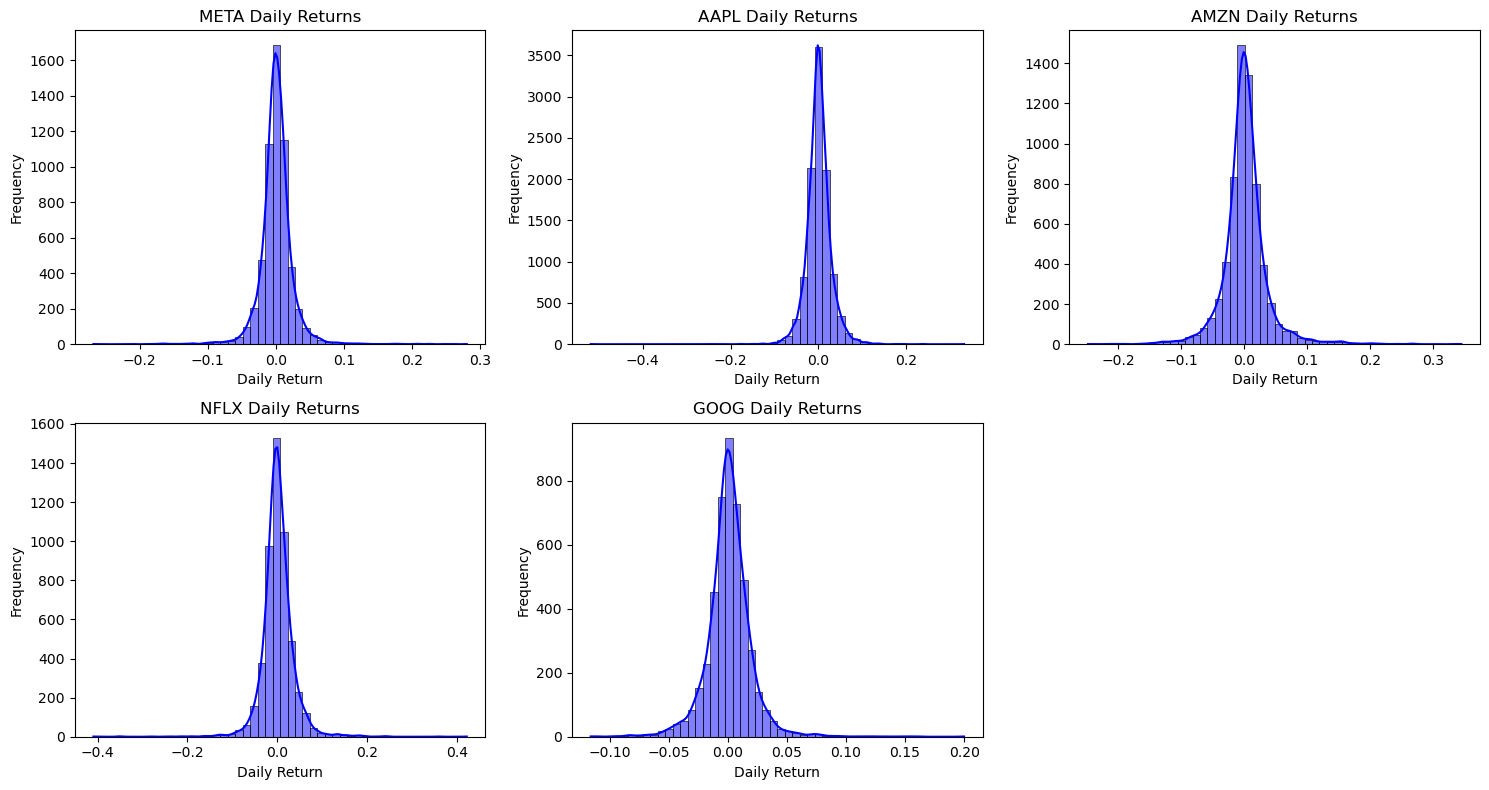

In [35]:
# Plot Histogram of Daily Returns

plt.figure(figsize=(15, 8))

for i, ticker in enumerate(tickers, 1):
    plt.subplot(2, 3, i)
    sns.histplot(stocks[ticker]['Daily Return'].dropna(), bins=50, kde=True, color='blue')
    plt.title(f'{ticker} Daily Returns')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig("dailyreturn.png")
plt.show()

The histogram is narrow for META, APPLE and NETFLIX, i.e; The stock is less volatile, meaning price changes are smaller and more stable.
The histogram is wide for AMAZON and GOOGLE, i.e;: The stock is more volatile, meaning price fluctuations are larger.
    
Skewness: The histogram leans slightly left (negative skew) for GOOGLE, the stock experiences more downward movements.
If it leans slightly right (positive skew) for GOOGLE, it experiences more upward movements.
The other three companies META, AMAZON, NETFLIX are not skewed.


## VOLATILITY for FAANG Stocks

In [37]:
print(stocks.keys())


dict_keys(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'])


In [39]:
faang_tickers = ['AAPL', 'AMZN', 'META', 'NFLX', 'GOOG']  

In [41]:
# Compute daily returns
for ticker in faang_tickers:
    stocks[ticker]['Returns'] = stocks[ticker]['Close'].pct_change()

    # Compute rolling volatility (30-day standard deviation of returns)
    stocks[ticker]['Volatility'] = stocks[ticker]['Returns'].rolling(window=30).std()


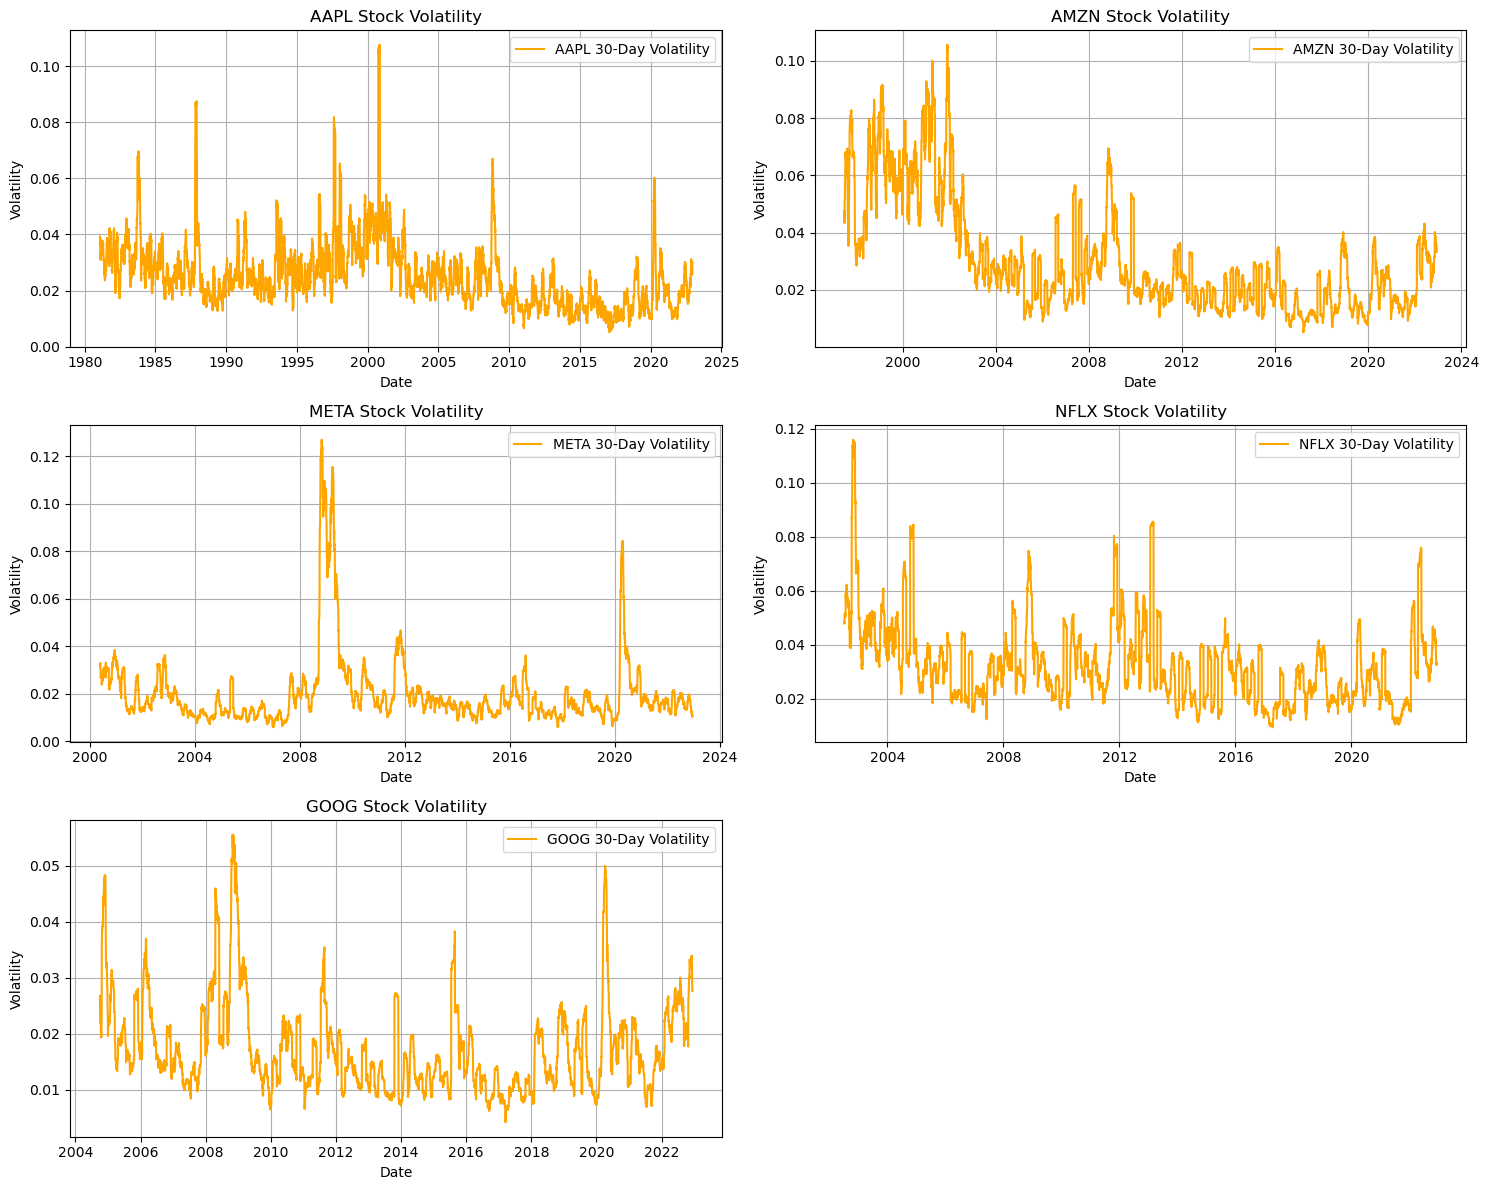

In [43]:
#  Volatility & Risk Analysis

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

faang_tickers = ['AAPL', 'AMZN', 'META', 'NFLX', 'GOOG']

for i, ticker in enumerate(faang_tickers):
    axes[i].plot(stocks[ticker]['Date'], stocks[ticker]['Volatility'], label=f'{ticker} 30-Day Volatility', color='orange')
    axes[i].set_title(f"{ticker} Stock Volatility")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Volatility")
    axes[i].legend()
    axes[i].grid()

# Hide the empty subplot if FAANG only has 5 stocks
axes[-1].set_visible(False)

plt.tight_layout()
plt.savefig("vola.png")
plt.show()


Risk Analysis & Interpretation

    - Higher Volatility: Indicates larger price swings (e.g., during market crashes or earnings reports).
    - Lower Volatility: Suggests stable stock performance.
Compare Across FAANG: 
    AAPL, AMAZON, NETFLIX's stock experiences more risk and potential investment opportunities.
        

<Figure size 1800x800 with 0 Axes>

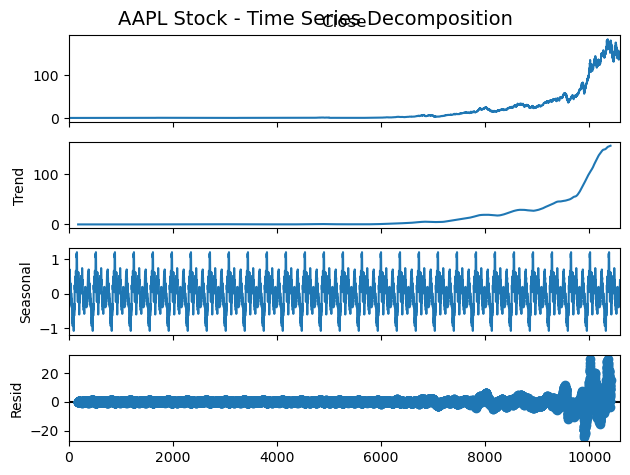

<Figure size 1800x800 with 0 Axes>

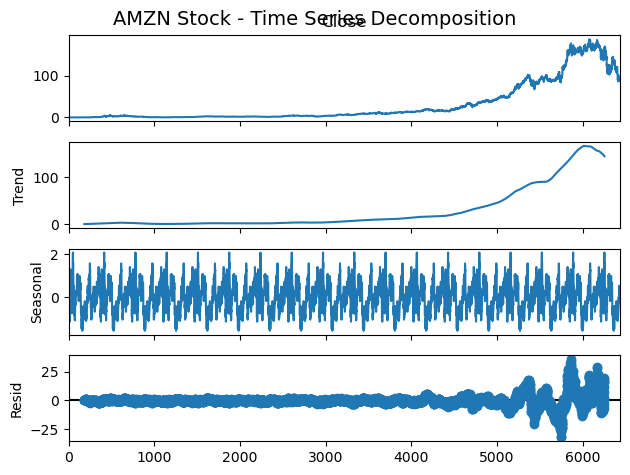

<Figure size 1800x800 with 0 Axes>

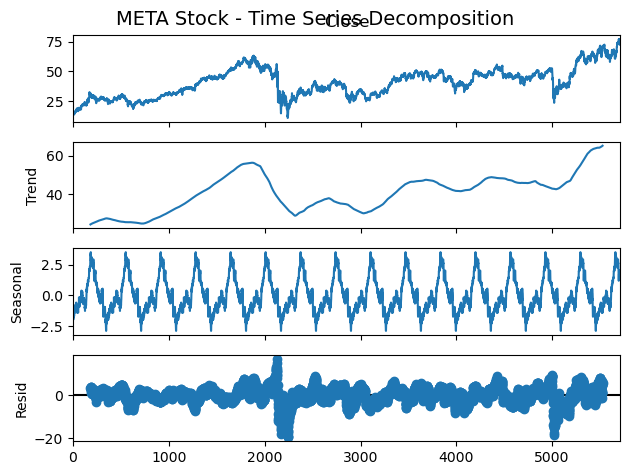

<Figure size 1800x800 with 0 Axes>

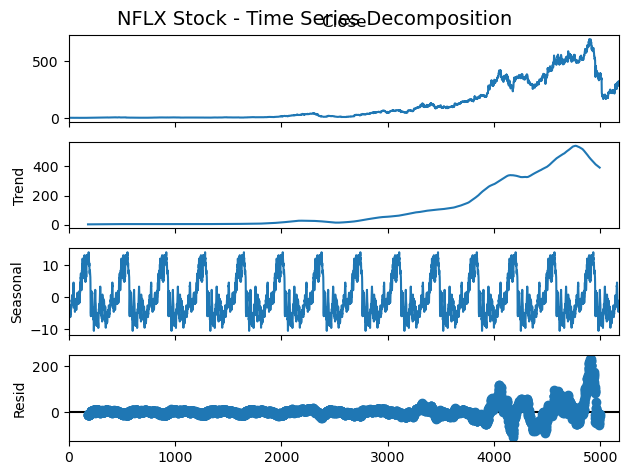

<Figure size 1800x800 with 0 Axes>

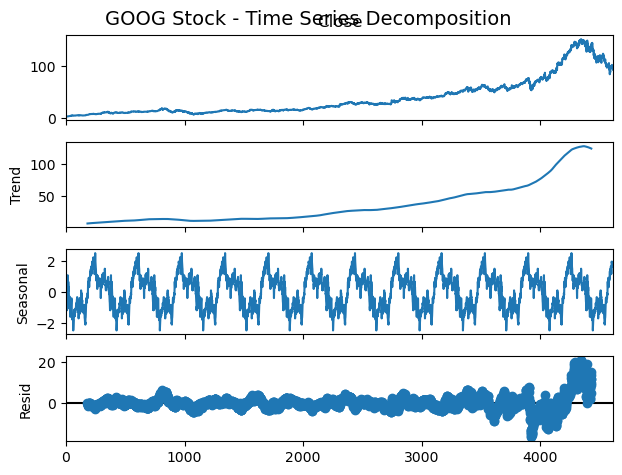

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Set the decomposition period (usually 365 for yearly seasonality)
decomposition_period = 365

# Decompose time series for each FAANG stock
faang_tickers = ['AAPL', 'AMZN', 'META', 'NFLX', 'GOOG']

for ticker in faang_tickers:
    plt.figure(figsize=(18, 8))

    # Perform decomposition
    decomposition = seasonal_decompose(stocks[ticker]['Close'], period=decomposition_period, model='additive')

    # Plot decomposition
    decomposition.plot()
    plt.suptitle(f"{ticker} Stock - Time Series Decomposition", fontsize=14)
    plt.savefig("ts.png")
    plt.show()


Interpretation of Decomposition Components: 

    - Trend: Long-term movement in stock prices (upward or downward).
    - Seasonal: Recurring patterns (e.g., holiday effects, earnings seasons).
    - Residual: Unexplained variations (market shocks, unexpected news).
This analysis helps in identifying market cycles and understanding how external factors impact stock prices.

## Stock price prediction

**1) Linear Regression**

**Training and Evaluation**

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define features
features = ['Open', 'High', 'Low', 'Volume']

# Dictionary to store models & results
faang_models = {}
faang_results = {}

# Iterate through FAANG stocks
for ticker in ['AAPL', 'AMZN', 'META', 'NFLX', 'GOOG']:
    print(f"\nTraining Linear Regression for {ticker}...\n")

    # Prepare data
    X = stocks[ticker][features]
    y = stocks[ticker]['Close']

    # Handle missing values
    X = X.dropna()
    y = y.loc[X.index]  # Ensure y aligns with X after dropping NaN values

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    predictions = model.predict(X_test)

    # Evaluate model
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    # Store results
    faang_models[ticker] = model
    faang_results[ticker] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}

    # Print evaluation metrics
    print(f"{ticker} Model Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")




Training Linear Regression for AAPL...

AAPL Model Performance:
Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.07
Root Mean Squared Error (RMSE): 0.27
R² Score: 0.9999

Training Linear Regression for AMZN...

AMZN Model Performance:
Mean Absolute Error (MAE): 0.16
Mean Squared Error (MSE): 0.15
Root Mean Squared Error (RMSE): 0.39
R² Score: 0.9999

Training Linear Regression for META...

META Model Performance:
Mean Absolute Error (MAE): 0.23
Mean Squared Error (MSE): 0.13
Root Mean Squared Error (RMSE): 0.36
R² Score: 0.9992

Training Linear Regression for NFLX...

NFLX Model Performance:
Mean Absolute Error (MAE): 0.86
Mean Squared Error (MSE): 3.91
Root Mean Squared Error (RMSE): 1.98
R² Score: 0.9999

Training Linear Regression for GOOG...

GOOG Model Performance:
Mean Absolute Error (MAE): 0.17
Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.33
R² Score: 0.9999


**Actual v/s Predicted Plot for Linear Regression model**

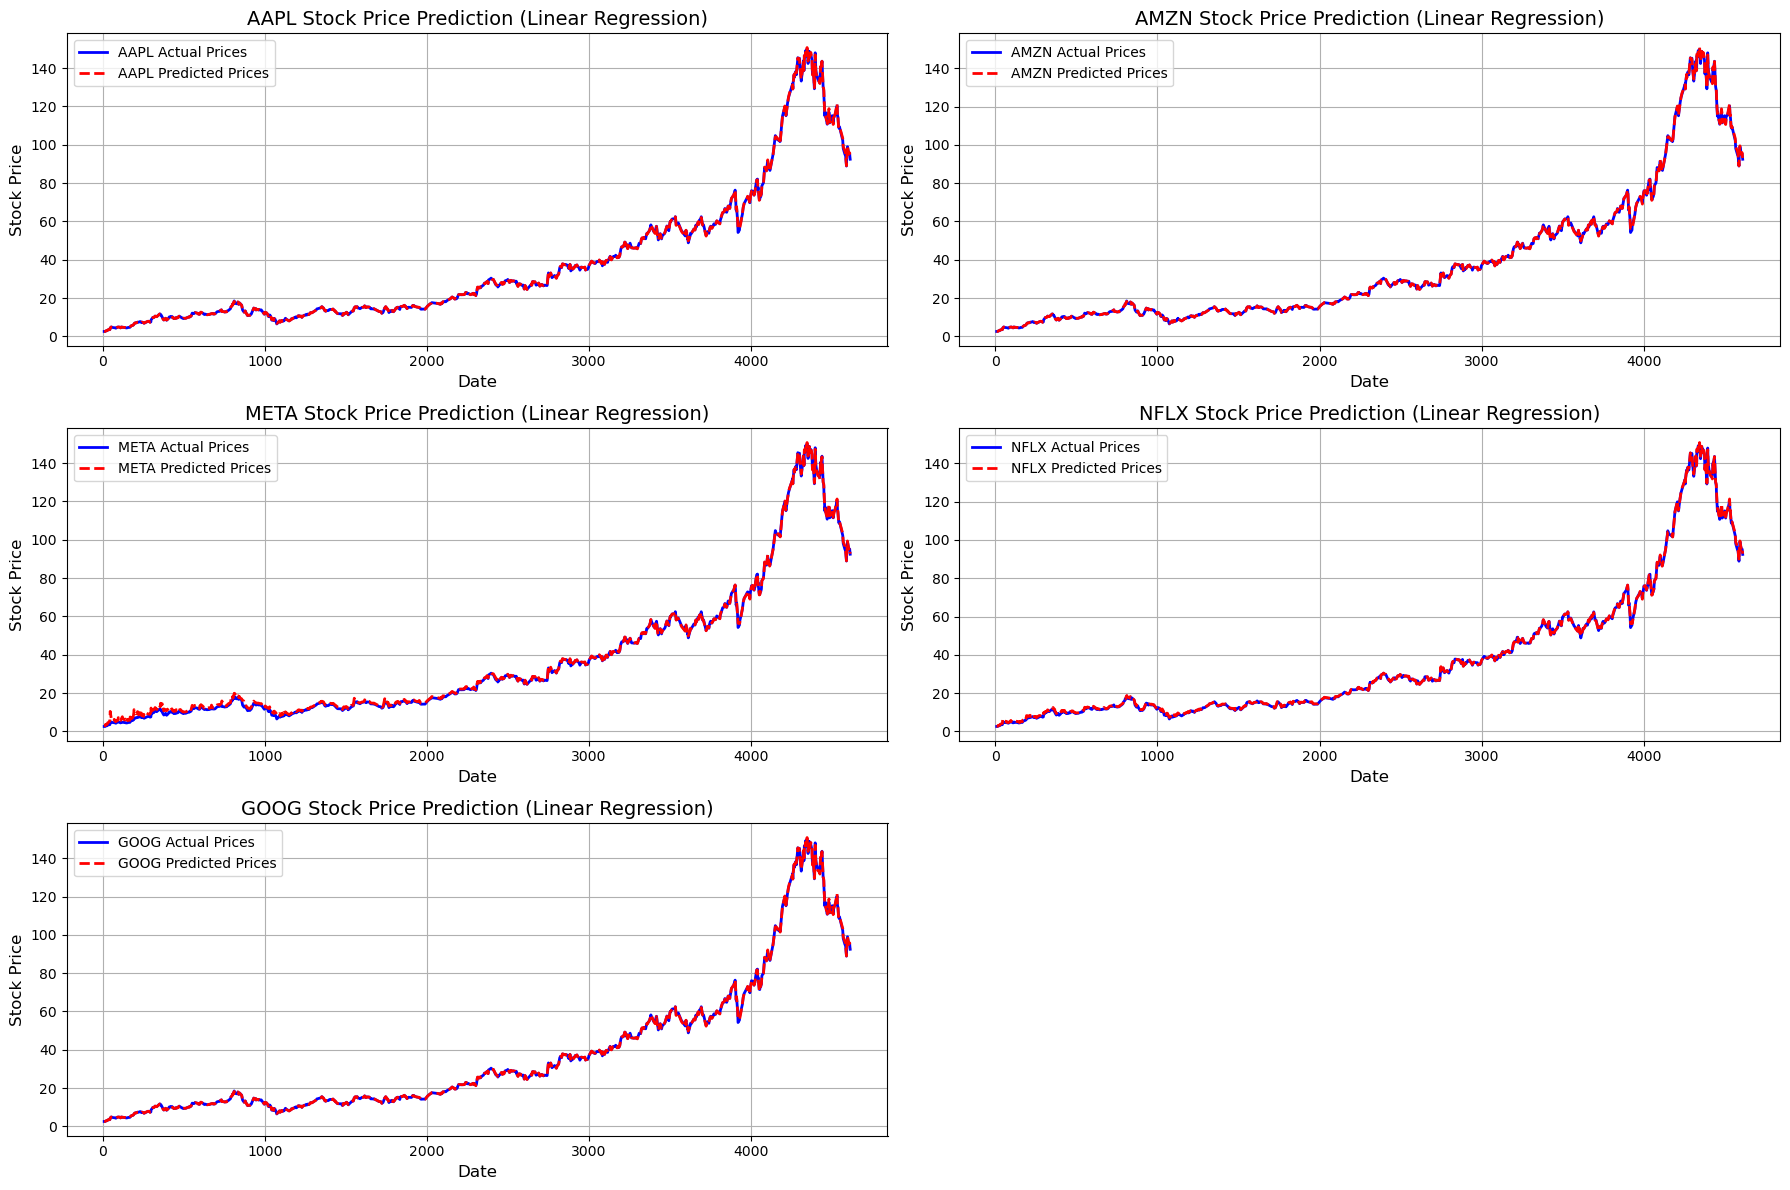

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Create a single figure with subplots for all FAANG stocks
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

faang_tickers = ['AAPL', 'AMZN', 'META', 'NFLX', 'GOOG']

for i, ticker in enumerate(faang_tickers):
    ax = axes[i]
    
    # Sorting test data for better visualization
    sorted_indices = np.argsort(y_test.index)
    sorted_dates = y_test.index[sorted_indices]
    sorted_actual = y_test.values[sorted_indices]
    sorted_predicted = faang_models[ticker].predict(X_test)[sorted_indices]

    # Plot actual vs predicted prices
    ax.plot(sorted_dates, sorted_actual, label=f"{ticker} Actual Prices", color="blue", linewidth=2)
    ax.plot(sorted_dates, sorted_predicted, linestyle="dashed", color="red", label=f"{ticker} Predicted Prices", linewidth=2)

    ax.set_title(f"{ticker} Stock Price Prediction (Linear Regression)", fontsize=14)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Stock Price", fontsize=12)
    ax.legend()
    ax.grid()

# Hide the last empty subplot (since FAANG has 5 stocks, not 6)
axes[-1].set_visible(False)

# Adjust layout and save the plot
plt.tight_layout()
plot_path = "faang_linear_regression_plot.png"
plt.savefig(plot_path)
plt.show()


**Residual Plot for Linear Regression**

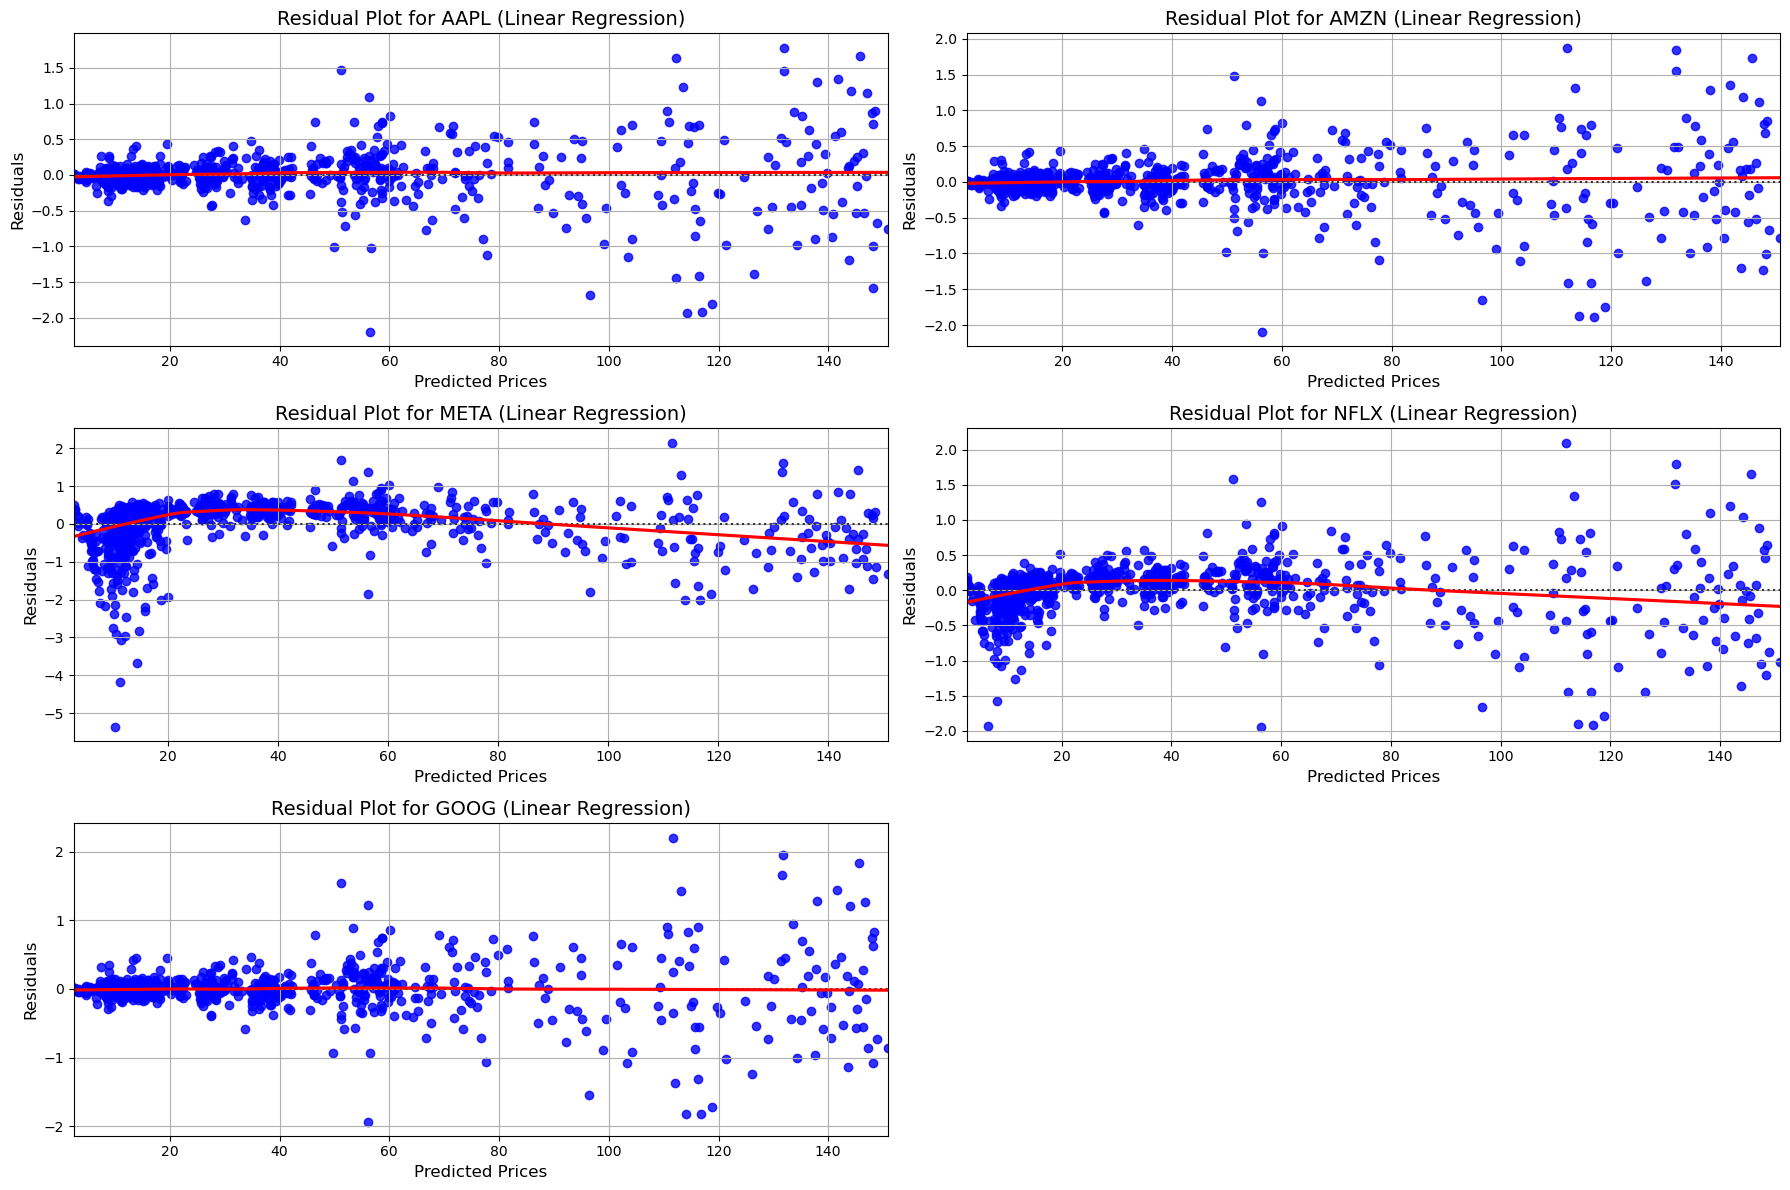

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for residual plots
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

faang_tickers = ['AAPL', 'AMZN', 'META', 'NFLX', 'GOOG']

for i, ticker in enumerate(faang_tickers):
    ax = axes[i]
    
    # Compute residuals
    actual_prices = y_test
    predicted_prices = faang_models[ticker].predict(X_test)
    residuals = actual_prices - predicted_prices

    # Residual plot
    sns.residplot(x=predicted_prices, y=residuals, lowess=True, ax=ax, color="blue", line_kws={"color": "red"})
    
    ax.set_title(f"Residual Plot for {ticker} (Linear Regression)", fontsize=14)
    ax.set_xlabel("Predicted Prices", fontsize=12)
    ax.set_ylabel("Residuals", fontsize=12)
    ax.grid()

# Hide the last empty subplot if necessary
axes[-1].set_visible(False)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("faang_residual_plot.png")
plt.show()


#### **2) LSTM**

**Training and Evaluation**


Training LSTM for AAPL...

Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - loss: 2.1091e-04
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 4.0868e-06
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 4.4564e-06
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 4.2192e-06
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - loss: 4.0932e-06
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 3.2779e-06
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 3.3110e-06
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - loss: 2.6249e-06
Epoch 9/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - loss: 2.6224e-06
Epoch 10/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 2.6093e-06
Epoch 11/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - loss: 3.3339e-06
Epoch 12/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - loss: 2.5570e-06
Epoch 13/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - loss: 1.8151e-06
Epoch 14/50
263/263

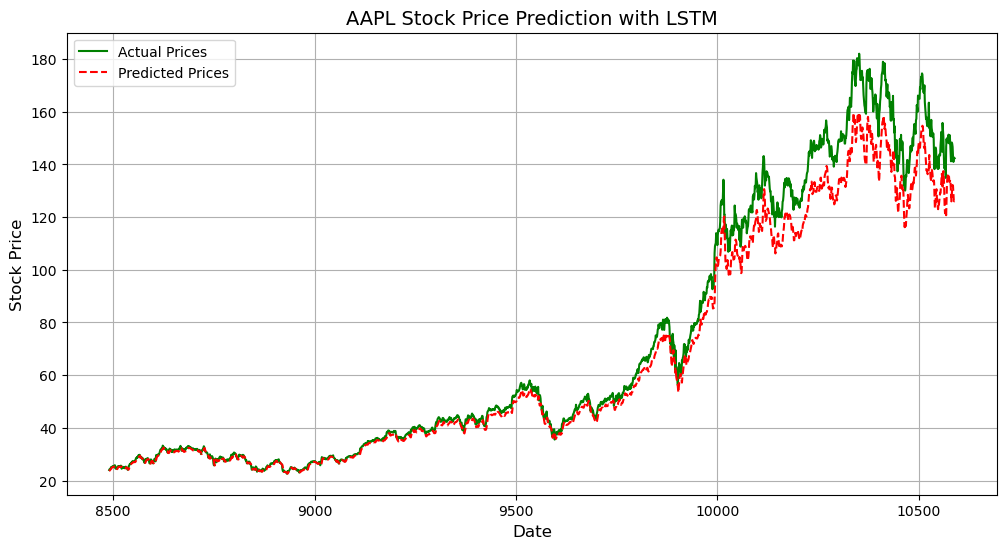


Training LSTM for AMZN...

Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0017
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 1.5622e-05
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 1.7609e-05
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 1.4625e-05
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 1.4674e-05
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 1.6530e-05
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 1.3195e-05
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 1.2027e-05
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 1.8756e-05
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 1.1582e-05
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 1.2677e-05
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 1.0390e-05
Epoch 13/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 1.0187e-05
Epoch 14/50
159/159 ━━━━━━━━━━

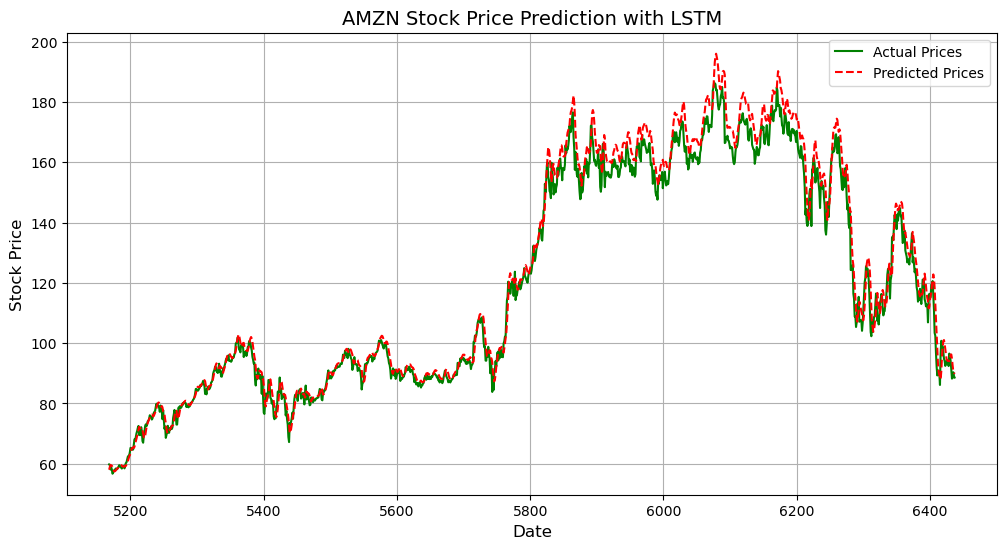


Training LSTM for META...

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - loss: 0.0487
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 7.0213e-04
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 5.9088e-04
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 4.5609e-04
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 4.1819e-04
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 3.4588e-04
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 3.2549e-04
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 2.7450e-04
Epoch 9/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 2.7061e-04
Epoch 10/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 2.5244e-04
Epoch 11/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 2.5064e-04
Epoch 12/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 2.3449e-04
Epoch 13/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 2.1145e-04
Epoch 14/50
141/141 ━━━━━━━━━━━━

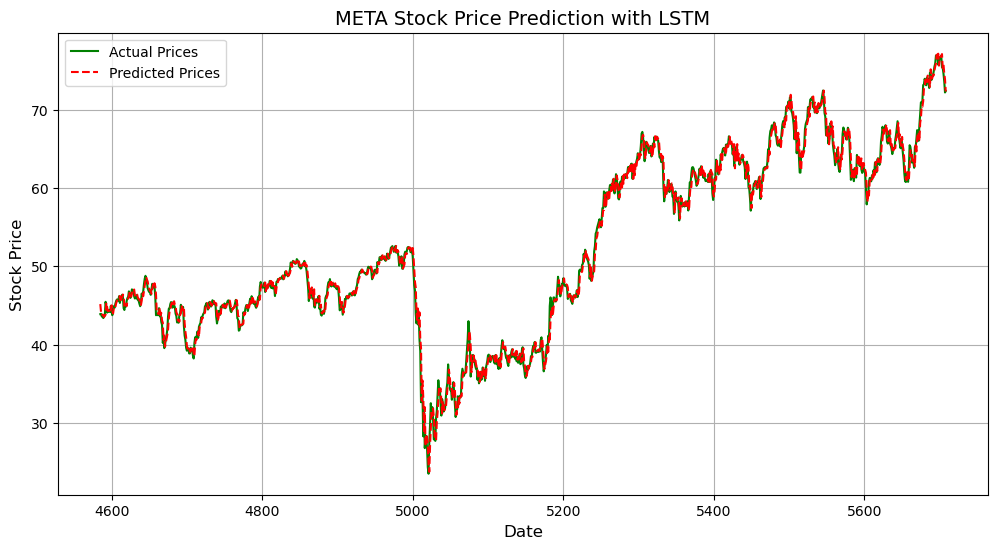


Training LSTM for NFLX...

Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - loss: 0.0060
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 1.0373e-04
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 9.2445e-05
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 9.7179e-05
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 8.0904e-05
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 8.4239e-05
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 8.9262e-05
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 6.5960e-05
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 7.1969e-05
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 5.5811e-05
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 6.3442e-05
Epoch 12/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 5.9277e-05
Epoch 13/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 6.7382e-05
Epoch 14/50
128/128 ━━━━━━━━━━━

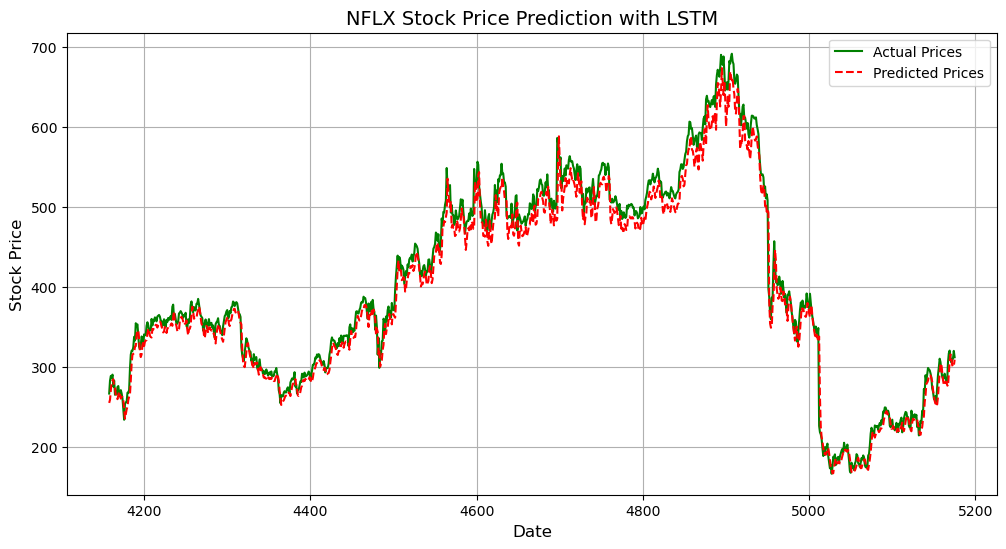


Training LSTM for GOOG...

Epoch 1/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - loss: 0.0071
Epoch 2/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 6.3422e-05
Epoch 3/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 5.2992e-05
Epoch 4/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 5.9433e-05
Epoch 5/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 4.9726e-05
Epoch 6/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 4.8719e-05
Epoch 7/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 4.5141e-05
Epoch 8/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 5.1218e-05
Epoch 9/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 5.0987e-05
Epoch 10/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 4.8413e-05
Epoch 11/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 4.1113e-05
Epoch 12/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 5.4539e-05
Epoch 13/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 9.0120e-05
Epoch 14/50
114/114 ━━━━━━━━━━━

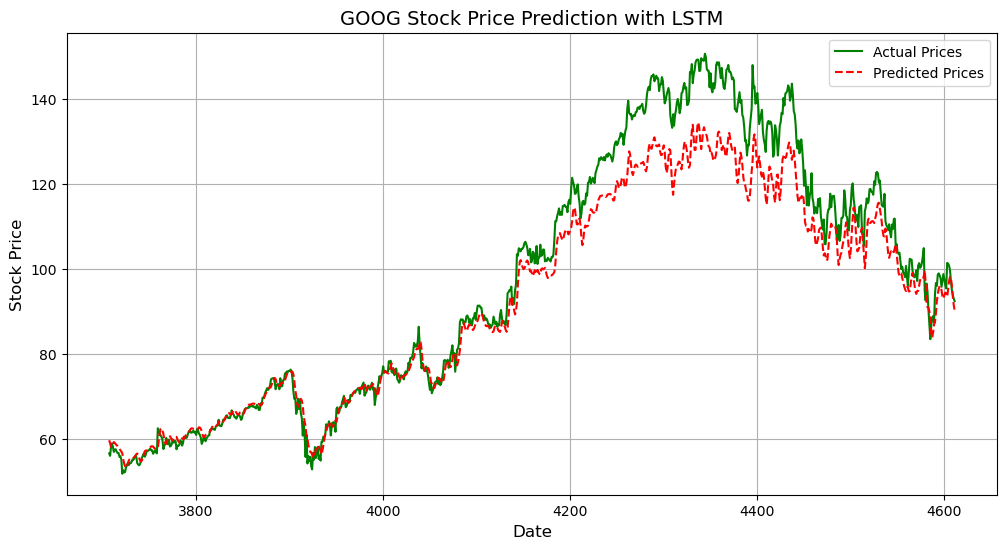


LSTM Model Performance (Lower RMSE is better):

AAPL: RMSE = 77.0071
AMZN: RMSE = 126.9431
META: RMSE = 52.9239
NFLX: RMSE = 408.9446
GOOG: RMSE = 94.9107


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Function to prepare data for LSTM
def prepare_data(df, feature_col, target_col, time_steps=60):
    """
    Prepare data for LSTM model by creating sequences.
    """
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[[feature_col, target_col]])

    X, y = [], []
    for i in range(time_steps, len(df)):
        X.append(scaled_data[i-time_steps:i, 0])
        y.append(scaled_data[i, 1])

    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for LSTM
    return X, y, scaler

# Dictionary to store results
faang_results = {}

# FAANG tickers 
faang_tickers = ['AAPL', 'AMZN', 'META', 'NFLX', 'GOOG']  

# Train LSTM for each FAANG company
for ticker in faang_tickers:
    if ticker not in stocks:
        print(f"Skipping {ticker}, data not found.")
        continue
    
    print(f"\nTraining LSTM for {ticker}...\n")

    df = stocks[ticker].dropna()  # Remove NaNs
    X, y, scaler = prepare_data(df, feature_col='Close', target_col='Close')

    # Split data into training and testing
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    lookback = 60  # Make sure this is consistent

    # Build LSTM Model
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    # Train Model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

    # Predict
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(np.hstack((np.zeros((len(predictions), 1)), predictions)))[:, 1]

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    faang_results[ticker] = {'RMSE': rmse}

    # Plot Actual vs Predicted Prices
    plt.figure(figsize=(12, 6))

    # Adjust index by skipping the first 'lookback' (60) values
    plt.plot(df.index[train_size + lookback:], df['Close'][train_size + lookback:], label='Actual Prices', color='green')
    plt.plot(df.index[train_size + lookback:], predictions, label='Predicted Prices', linestyle="dashed", color='red')
    
    plt.title(f"{ticker} Stock Price Prediction with LSTM", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Stock Price", fontsize=12)
    plt.legend()
    plt.grid()

    # Save plot correctly
    plt.savefig(f"{ticker}_LSTM_Evaluation.png")  
    plt.show()

# Print RMSE results
print("\nLSTM Model Performance (Lower RMSE is better):\n")
for ticker, metrics in faang_results.items():
    print(f"{ticker}: RMSE = {metrics['RMSE']:.4f}")


**Residual Plot for LSTM Model**

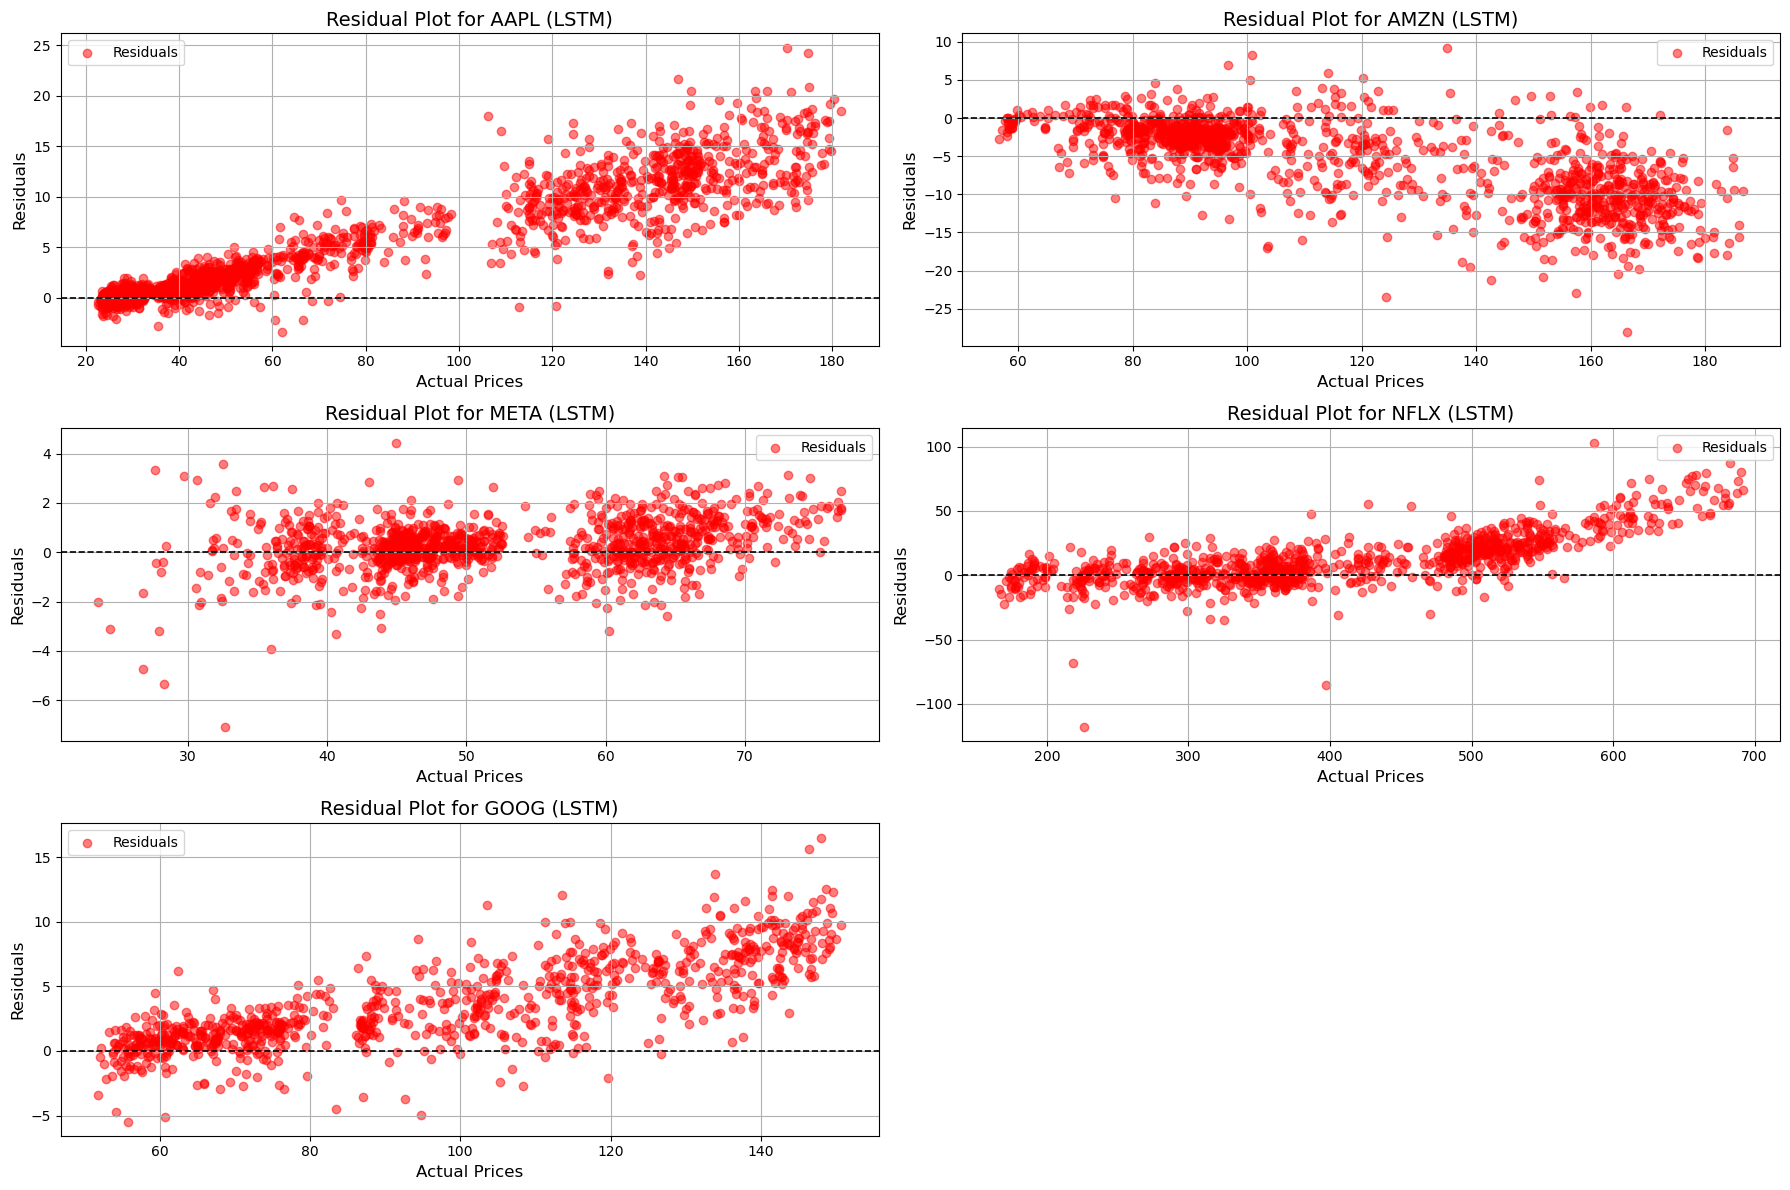

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Create a single figure with subplots for all FAANG stocks
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

faang_tickers = ['AAPL', 'AMZN', 'META', 'NFLX', 'GOOG']

for i, ticker in enumerate(faang_tickers):
    ax = axes[i]
    
    if ticker not in faang_results:
        ax.set_visible(False)
        continue

    # Retrieve actual prices and residuals from the results dictionary
    actuals = faang_results[ticker]['actuals']
    residuals = faang_results[ticker]['residuals']
    
    # Plot residuals
    ax.scatter(actuals, residuals, color='red', alpha=0.5, label="Residuals")
    ax.axhline(y=0, color='black', linestyle="--", linewidth=1.2)
    
    ax.set_title(f"Residual Plot for {ticker} (LSTM)", fontsize=14)
    ax.set_xlabel("Actual Prices", fontsize=12)
    ax.set_ylabel("Residuals", fontsize=12)
    ax.legend()
    ax.grid()


axes[-1].set_visible(False)

# Final layout adjustments
plt.tight_layout()
plt.savefig("faang_lstm_residuals.png")
plt.show()


#### 3) **Trading Strategy Backtesting**

Trading strategy:-

Buy signal (1): When the 50-day moving average (MA50) is above the 200-day moving average (MA200).
Sell signal (0): When MA50 is below MA200.


Backtesting SMA Strategy for AAPL...



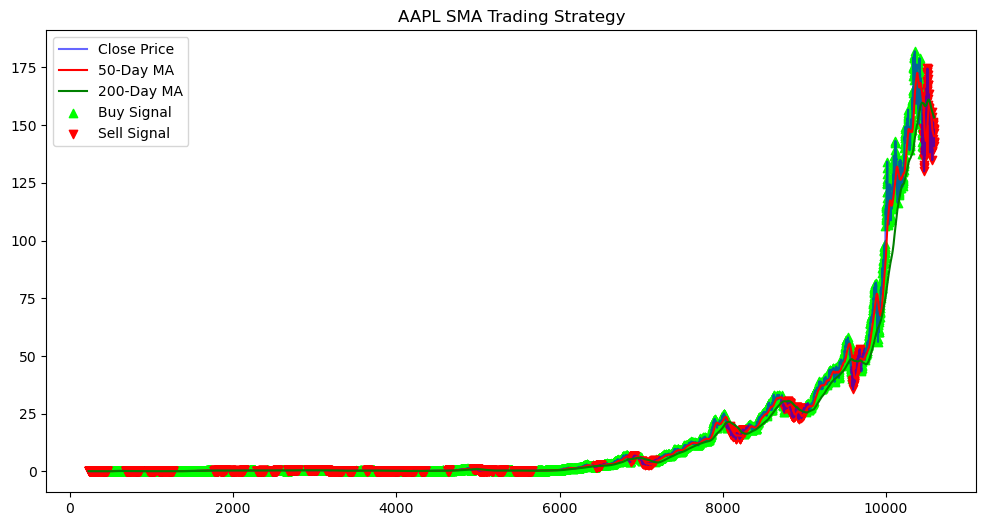


Backtesting SMA Strategy for AMZN...



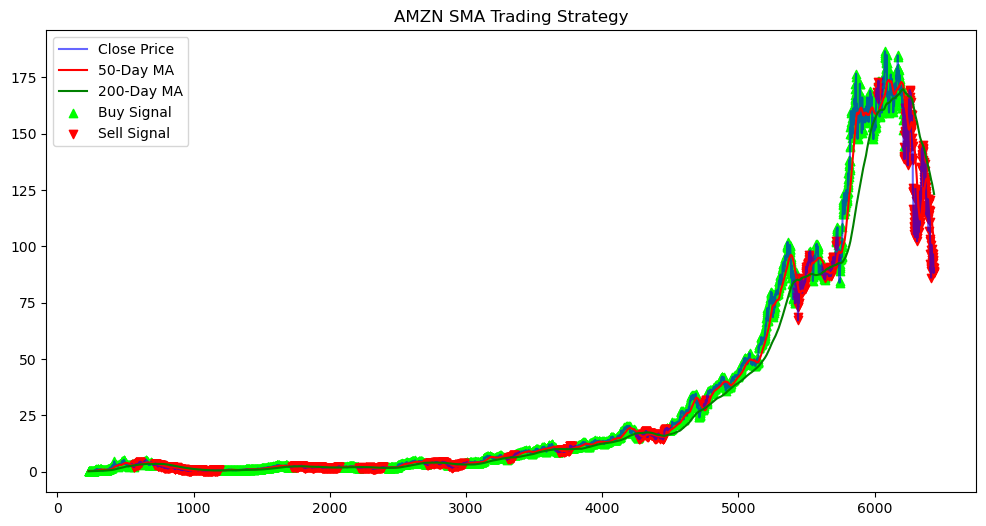


Backtesting SMA Strategy for META...



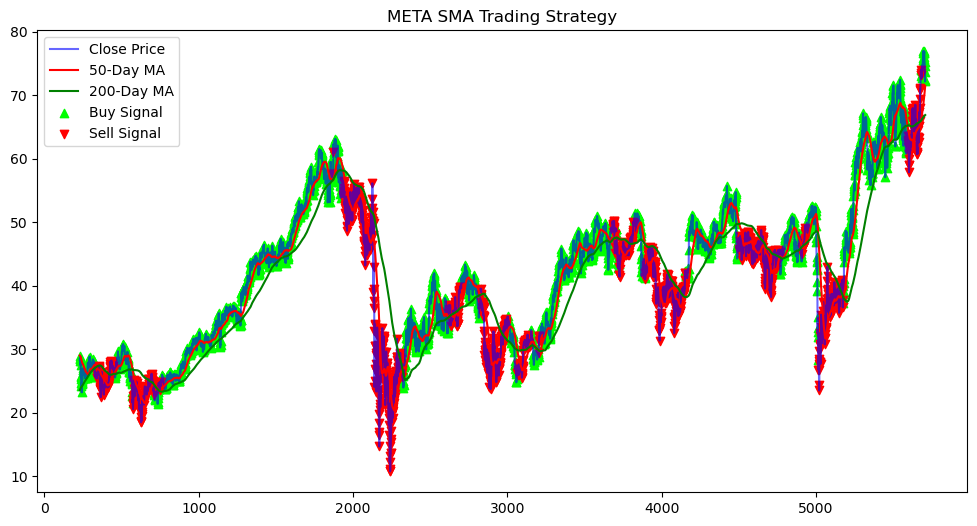


Backtesting SMA Strategy for NFLX...



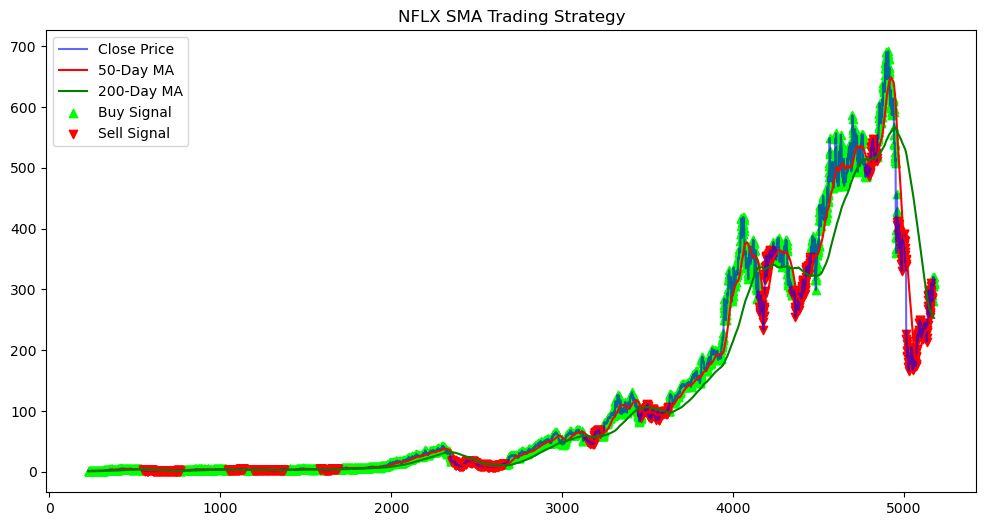


Backtesting SMA Strategy for GOOG...



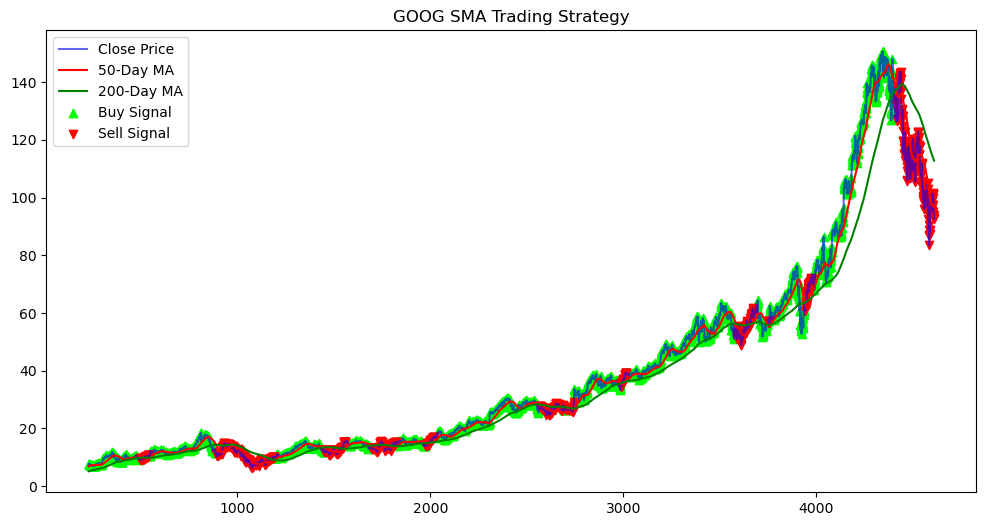

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary to store strategy results
faang_strategy = {}

# Apply SMA Trading Strategy for Each FAANG Stock
for ticker in ['AAPL', 'AMZN', 'MET', 'NFLX', 'GOOG']:
    print(f"\nBacktesting SMA Strategy for {ticker}...\n")

    # Ensure stock data exists
    if ticker not in stocks:
        print(f"Data for {ticker} not found. Skipping...")
        continue
    
    df = stocks[ticker].dropna()  # Remove NaNs
    
    # Check if Close column exists
    if 'Close' not in df.columns:
        print(f"Missing 'Close' column for {ticker}. Skipping...")
        continue

    # Calculate 50-day and 200-day Simple Moving Averages (SMA)
    df['MA50'] = df['Close'].rolling(window=50).mean()
    df['MA200'] = df['Close'].rolling(window=200).mean()
    
    # Drop rows with NaN values from moving averages
    df.dropna(inplace=True)

    # Define Trading Signals
    df['Signal'] = np.where(df['MA50'] > df['MA200'], 1, 0)  # 1 = Buy, 0 = Sell

    # Store strategy in dictionary
    faang_strategy[ticker] = df[['Close', 'MA50', 'MA200', 'Signal']].copy()

    # Plot SMA Trading Signals
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.6)
    plt.plot(df['MA50'], label='50-Day MA', color='red')
    plt.plot(df['MA200'], label='200-Day MA', color='green')

    # Highlight Buy & Sell Signals
    buy_signals = df[df['Signal'] == 1]
    sell_signals = df[df['Signal'] == 0]

    plt.scatter(buy_signals.index, buy_signals['Close'], label='Buy Signal', marker='^', color='lime', alpha=1)
    plt.scatter(sell_signals.index, sell_signals['Close'], label='Sell Signal', marker='v', color='red', alpha=1)

    plt.title(f"{ticker} SMA Trading Strategy")
    plt.legend()
    plt.savefig(f"{ticker}_SMA.png") 
    plt.show()


   - Buy Signal (Green Upward Arrows) → When MA50 crosses above MA200 (bullish trend).
   - Sell Signal (Red Downward Arrows) → When MA50 crosses below MA200 (bearish trend).
   - Backtesting Visualization → Compares strategy with actual stock price movements.
    


Interpretation of the SMA Trading Strategy Results

The Simple Moving Average (SMA) trading strategy is a classic trend-following approach that generates buy and sell signals based on the crossover of two moving averages:

    Buy Signal (Green Triangle ▲): When the 50-day SMA (MA50) crosses above the 200-day SMA (MA200), indicating a potential uptrend.
    Sell Signal (Red Triangle ▼): When MA50 crosses below MA200, signaling a possible downtrend.

Stock-wise Interpretation
1. AAPL (Apple)

    The SMA strategy was effective in identifying major long-term uptrends in AAPL stock.
    Buy signals were triggered at early-stage uptrends, capturing strong bullish movements.
    Sell signals mostly occurred during corrections, but some appeared late in the downward trend, meaning potential losses if the stock had already dropped significantly before selling.

2. AMZN (Amazon)

    The SMA strategy followed long-term trends well but showed some delayed signals.
    The strategy missed some short-term price recoveries, meaning traders might exit early and miss out on potential gains.
    Overall, AMZN’s strong upward movement meant the buy signals resulted in good long-term profits.

3. GOOG (Alphabet)

    The SMA strategy performed similarly to AMZN, capturing broad trends well.
    However, some false sell signals appeared during minor corrections, which could have led to premature exits before prices rebounded.
    The overall effectiveness was moderate, with long-term profitability but short-term inefficiencies.

4. META (Facebook)

    The strategy worked well in steady uptrends but struggled in volatile periods.
    During major market corrections, sell signals were triggered late, potentially locking in losses instead of preventing them.
    Buy signals aligned with recoveries, indicating long-term profitability if held through volatility.

5. NFLX (Netflix)

    Due to NFLX’s high volatility, the strategy showed late buy and sell signals.
    Many buy signals were followed by steep drops, leading to potential false positives.
    This suggests that SMA alone is not sufficient for highly volatile stocks, and additional indicators (e.g., Relative Strength Index (RSI) or Moving Average Convergence Divergence (MACD)) could improve trade timing.

### 4) **Transformer model**

**Normalization**

In [57]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch

# Load FAANG stock data
faang_tickers = ['AAPL', 'AMZN', 'MET', 'NFLX', 'GOOG']
stocks = {ticker: pd.read_csv(f"{ticker}.csv", parse_dates=['Date'], index_col='Date') for ticker in faang_tickers}

# Normalize stock prices for all stocks
scalers = {}
for ticker in faang_tickers:
    scaler = MinMaxScaler(feature_range=(0, 1))
    stocks[ticker]['Normalized_Close'] = scaler.fit_transform(stocks[ticker]['Close'].values.reshape(-1, 1))
    scalers[ticker] = scaler  # Save the scaler for inverse transformation


**Training**

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Transformer Model with Input Expansion
class StockTransformer(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim):
        super(StockTransformer, self).__init__()

        # Expand input dimension from 1 to model_dim (64)
        self.embedding = nn.Linear(input_dim, model_dim)

        self.encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(model_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)  # Expanding input dimension
        x = self.transformer_encoder(x)
        x = self.fc(x)
        return x

# Hyperparameters
model_dim = 64  # Adjusted to match the transformer input
num_heads = 4
num_layers = 2
output_dim = 1
input_dim = 1  # Since we are using one feature (Normalized_Close)

# Updated Prepare Data Function to Ensure Proper Input Shape
def prepare_data(df):
    X = torch.tensor(df['Normalized_Close'].values[:-1], dtype=torch.float32).unsqueeze(1)  # Shape (N, 1)
    y = torch.tensor(df['Normalized_Close'].values[1:], dtype=torch.float32).unsqueeze(1)  # Shape (N, 1)

    dataset = TensorDataset(X, y)
    return DataLoader(dataset, batch_size=32, shuffle=True)

# Train Transformer Function
def train_transformer(model, loader, optimizer, loss_fn, epochs=50):
    for epoch in range(epochs):
        for X_batch, y_batch in loader:
            optimizer.zero_grad()

            # Transformer requires input to be in (sequence_length, batch_size, features)
            X_batch = X_batch.unsqueeze(0)  # Convert to (1, batch_size, features)

            predictions = model(X_batch).squeeze(0)  # Remove extra dimension
            loss = loss_fn(predictions, y_batch)

            loss.backward()
            optimizer.step()
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss {loss.item()}")

# Train Transformer for Each FAANG Stock
transformers = {}
for ticker in faang_tickers:
    stock_transformer = StockTransformer(input_dim=input_dim, model_dim=model_dim, num_heads=num_heads, num_layers=num_layers, output_dim=output_dim)
    optimizer = optim.Adam(stock_transformer.parameters(), lr=0.001)
    loss_fn = nn.MSELoss()

    train_loader = prepare_data(stocks[ticker])
    train_transformer(stock_transformer, train_loader, optimizer, loss_fn, epochs=50)

    transformers[ticker] = stock_transformer  # Save trained models


Epoch 0: Loss 0.0015134753193706274
Epoch 10: Loss 0.00037774545489810407
Epoch 20: Loss 0.00042385936831124127
Epoch 30: Loss 4.341120438766666e-05
Epoch 40: Loss 9.886176121653989e-05
Epoch 0: Loss 0.0013037355383858085
Epoch 10: Loss 3.130937329842709e-05
Epoch 20: Loss 0.00093409838154912
Epoch 30: Loss 0.00018297103815712035
Epoch 40: Loss 0.0003522951155900955
Epoch 0: Loss 0.009728219360113144
Epoch 10: Loss 0.0009243549429811537
Epoch 20: Loss 0.0005770950228907168
Epoch 30: Loss 0.001423597801476717
Epoch 40: Loss 0.0002608324575703591
Epoch 0: Loss 0.0025308753829449415
Epoch 10: Loss 0.00047672426444478333
Epoch 20: Loss 0.0009752060868777335
Epoch 30: Loss 0.0005768868722952902
Epoch 40: Loss 0.00023434632748831064
Epoch 0: Loss 0.006059039384126663
Epoch 10: Loss 0.0006647659465670586
Epoch 20: Loss 0.00011656145943561569
Epoch 30: Loss 0.0002898437378462404
Epoch 40: Loss 0.001909985556267202


**Actual v/s Predicted plot of Transformer model**

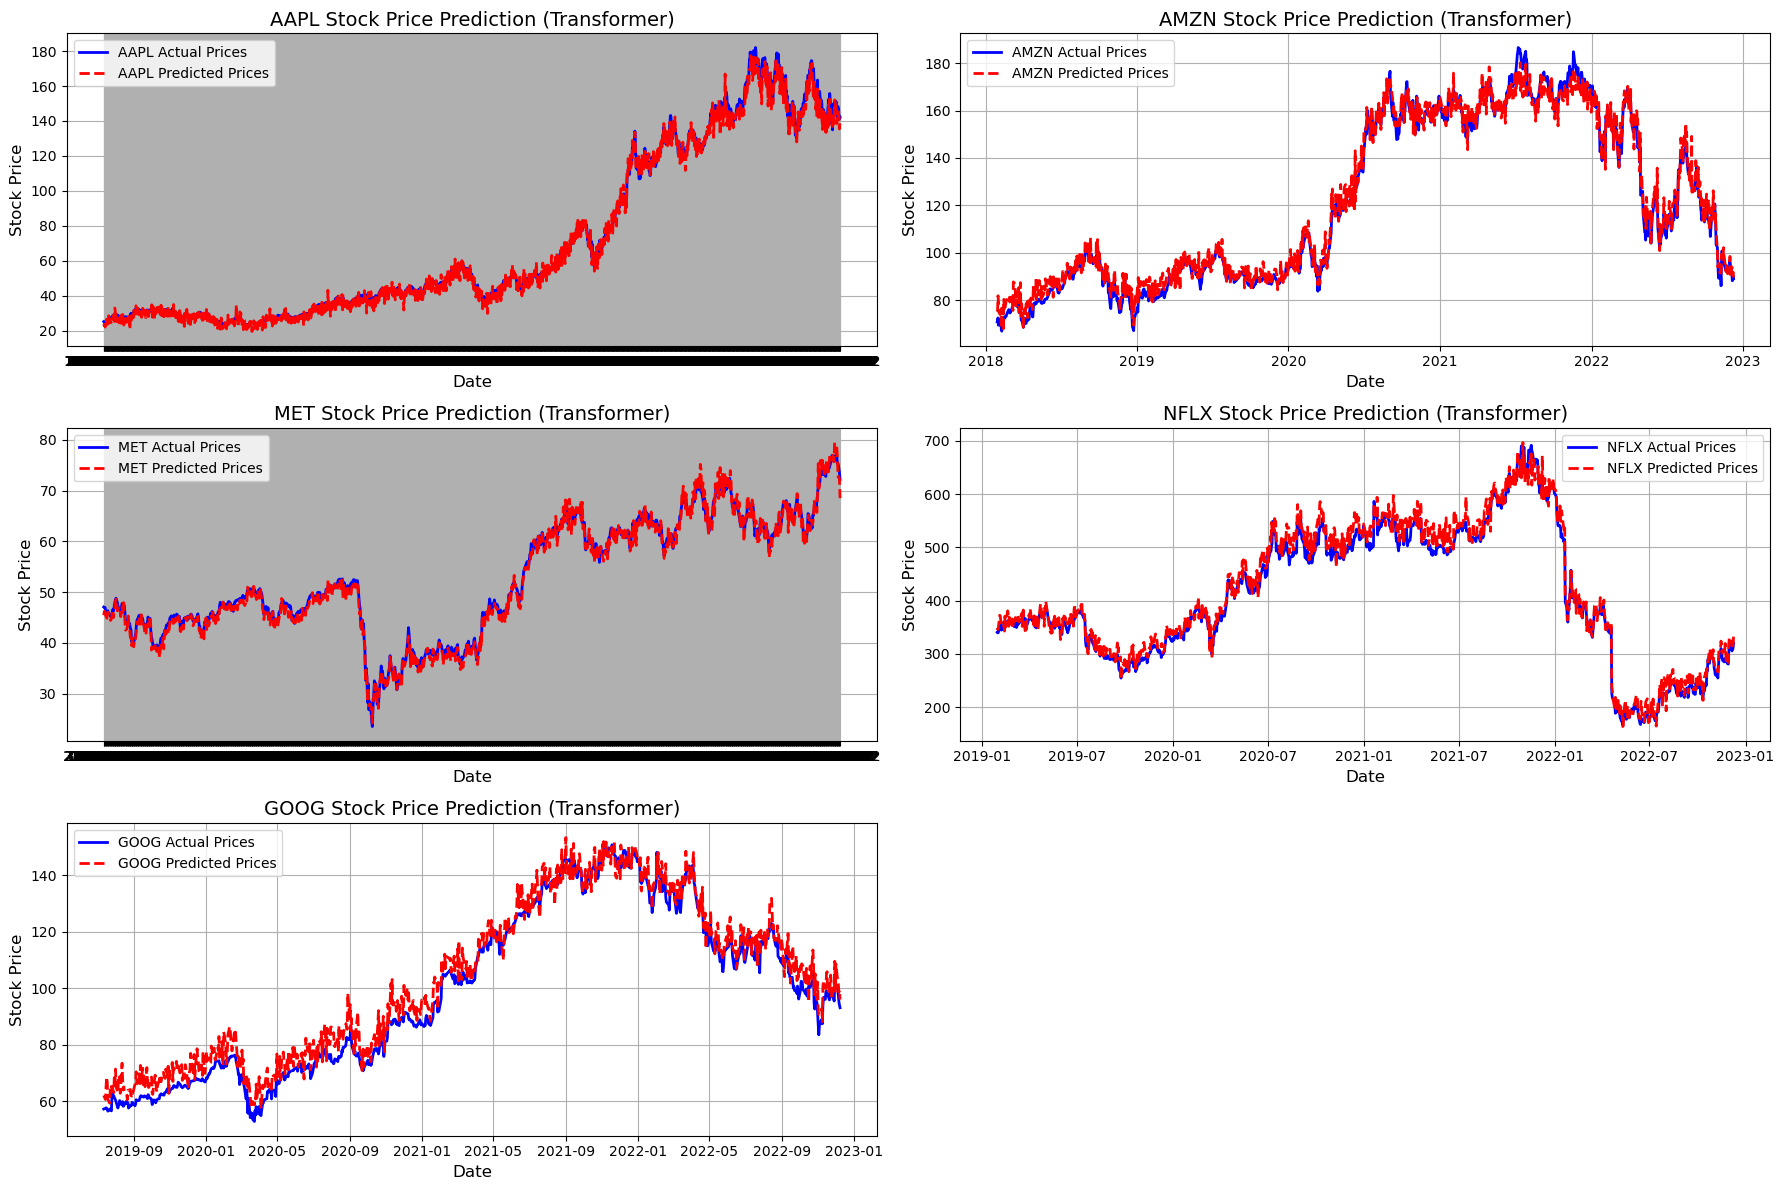

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create a figure with subplots for all FAANG stocks
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

faang_tickers = ['AAPL', 'AMZN', 'MET', 'NFLX', 'GOOG']
faang_predictions = {}

for i, ticker in enumerate(faang_tickers):
    ax = axes[i]

    df = stocks[ticker].dropna()  # Ensure data is clean
    train_size = int(len(df) * 0.8)  # 80% training data
    lookback = 60  # Consistency with GRU model

    # Get actual stock prices
    actual_prices = df['Close'].values[train_size + lookback:]  # Skipping the lookback period
    actual_dates = df.index[train_size + lookback:]  # Corresponding dates

    # Generate predictions
    with torch.no_grad():
        X_test = torch.tensor(df['Normalized_Close'].values[train_size + lookback:-1], dtype=torch.float32).unsqueeze(1)
        predictions = transformers[ticker](X_test.unsqueeze(0)).squeeze(0).numpy()
        predictions = scalers[ticker].inverse_transform(predictions.reshape(-1, 1)).flatten()  # Ensure shape matches

    # Ensure predicted prices and actual prices have the same length
    min_len = min(len(actual_prices), len(predictions))
    actual_prices = actual_prices[:min_len]
    actual_dates = actual_dates[:min_len]
    predictions = predictions[:min_len]

    faang_predictions[ticker] = predictions

    # Plot actual vs predicted prices
    ax.plot(actual_dates, actual_prices, label=f"{ticker} Actual Prices", color="blue", linewidth=2)
    ax.plot(actual_dates, predictions, linestyle="dashed", color="red", label=f"{ticker} Predicted Prices", linewidth=2)

    ax.set_title(f"{ticker} Stock Price Prediction (Transformer)", fontsize=14)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Stock Price", fontsize=12)
    ax.legend()
    ax.grid()


axes[-1].set_visible(False)

plt.tight_layout()
plt.savefig("transformer_predictions.png")
plt.show()


**Evaluating Transformer model**

In [63]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Dictionary to store RMSE results
gru_transformer_rmse = {}

for ticker in faang_tickers:
    df = stocks[ticker].dropna()
    train_size = int(len(df) * 0.8)
    lookback = 60

    actual_prices = df['Close'].values[train_size + lookback:]  # Actual stock prices
    predicted_prices = faang_predictions[ticker]  # Model predictions

    # Ensure actual and predicted prices have the same length
    min_len = min(len(actual_prices), len(predicted_prices))
    actual_prices = actual_prices[:min_len]
    predicted_prices = predicted_prices[:min_len]

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
    gru_transformer_rmse[ticker] = rmse

# Print RMSE results
print("\nTransformer Model RMSE Results:\n")
for ticker, rmse in gru_transformer_rmse.items():
    print(f"{ticker}: RMSE = {rmse:.4f}")



Transformer Model RMSE Results:

AAPL: RMSE = 3.4393
AMZN: RMSE = 4.3784
MET: RMSE = 1.1277
NFLX: RMSE = 18.3680
GOOG: RMSE = 5.4909


**Residual Plot for Transformer model*

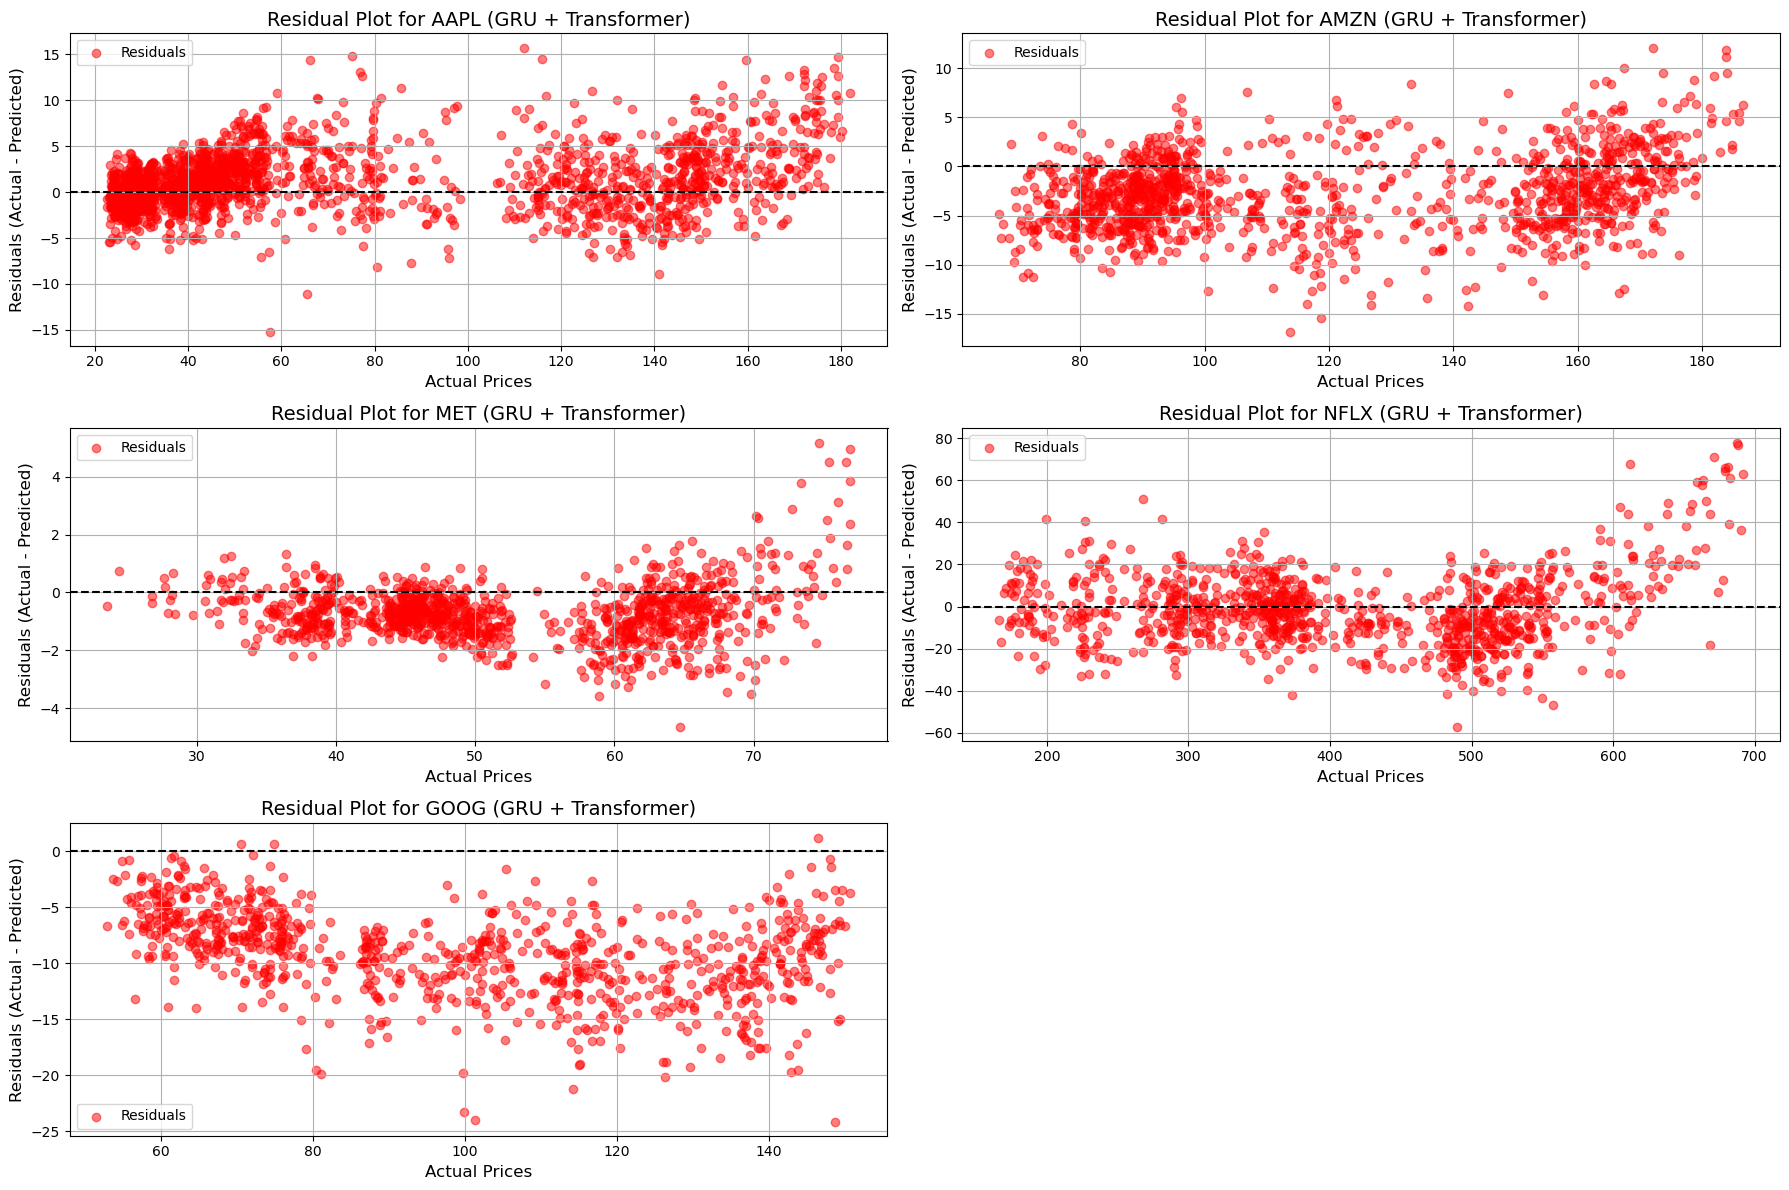

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with subplots for all FAANG stocks
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

for i, ticker in enumerate(faang_tickers):
    ax = axes[i]
    
    df = stocks[ticker].dropna()
    train_size = int(len(df) * 0.8)
    lookback = 60  # Consistency with GRU model

    # Align actual and predicted values
    actual_prices = df['Close'].values[train_size + lookback:]
    predicted_prices = faang_predictions[ticker]

    # Ensure both arrays have the same length
    min_length = min(len(actual_prices), len(predicted_prices))
    actual_prices = actual_prices[:min_length]
    predicted_prices = predicted_prices[:min_length]

    # Compute residuals (errors)
    residuals = actual_prices - predicted_prices

    # Plot residuals
    ax.scatter(actual_prices, residuals, color='red', alpha=0.5, label="Residuals")
    ax.axhline(y=0, color='black', linestyle="--", linewidth=1.5)  # Horizontal zero line
    
    ax.set_title(f"Residual Plot for {ticker} (Transformer)", fontsize=14)
    ax.set_xlabel("Actual Prices", fontsize=12)
    ax.set_ylabel("Residuals (Actual - Predicted)", fontsize=12)
    ax.legend()
    ax.grid()

# Hide last subplot if unnecessary (since we only have 5 stocks)
axes[-1].set_visible(False)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("transformer_residuals.png")
plt.show()


**Testing : Forecast using Transformer model for Next 7 days**

In [77]:
import pandas as pd
from datetime import timedelta
import torch

def predict_future_price(model, last_price):
    with torch.no_grad():
        return model(torch.tensor([last_price], dtype=torch.float32).unsqueeze(1)).item()

future_predictions = {}

for ticker in faang_tickers:
    # Ensure the index is in datetime format
    stocks[ticker].index = pd.to_datetime(stocks[ticker].index, dayfirst=True, errors='coerce')

    # Check for any conversion errors
    if stocks[ticker].index.isnull().any():
        print(f"Warning: Some dates could not be converted for {ticker}. Check data format!")

    # Get last known date and time
    last_datetime = stocks[ticker].index[-1]  
    last_price = stocks[ticker]['Normalized_Close'].values[-1]  # Last known normalized price

    # Store weekly predictions
    weekly_predictions = []

    for i in range(7):  # Predict for the next 7 days
        predicted_price = predict_future_price(transformers[ticker], last_price)

        # Convert back to original scale
        predicted_price_original = scalers[ticker].inverse_transform([[predicted_price]])[0][0]

        # Store prediction with date
        predicted_datetime = last_datetime + timedelta(days=i + 1)
        weekly_predictions.append((predicted_datetime.strftime('%d-%m-%Y'), predicted_price_original))

        # Use the newly predicted price for the next day's prediction
        last_price = predicted_price  # Update for next iteration

    # Store all weekly predictions for the stock
    future_predictions[ticker] = weekly_predictions

# Print Predictions for the Next 7 Days
for ticker, predictions in future_predictions.items():
    print(f"\nPredictions for {ticker} for the next 7 days:")
    for date, price in predictions:
        print(f"{date}: {price:.2f}")



Predictions for AAPL for the next 7 days:
13-12-2022: 136.30
14-12-2022: 141.55
15-12-2022: 138.50
16-12-2022: 137.26
17-12-2022: 131.47
18-12-2022: 130.37
19-12-2022: 136.00

Predictions for AMZN for the next 7 days:
13-12-2022: 86.48
14-12-2022: 92.54
15-12-2022: 93.39
16-12-2022: 94.16
17-12-2022: 94.98
18-12-2022: 92.68
19-12-2022: 95.33

Predictions for MET for the next 7 days:
13-12-2022: 72.11
14-12-2022: 70.78
15-12-2022: 71.35
16-12-2022: 72.91
17-12-2022: 74.44
18-12-2022: 73.50
19-12-2022: 72.29

Predictions for NFLX for the next 7 days:
13-12-2022: 318.53
14-12-2022: 302.06
15-12-2022: 313.18
16-12-2022: 287.44
17-12-2022: 290.64
18-12-2022: 295.70
19-12-2022: 301.66

Predictions for GOOG for the next 7 days:
13-12-2022: 97.46
14-12-2022: 101.44
15-12-2022: 115.71
16-12-2022: 123.65
17-12-2022: 135.58
18-12-2022: 147.53
19-12-2022: 153.01


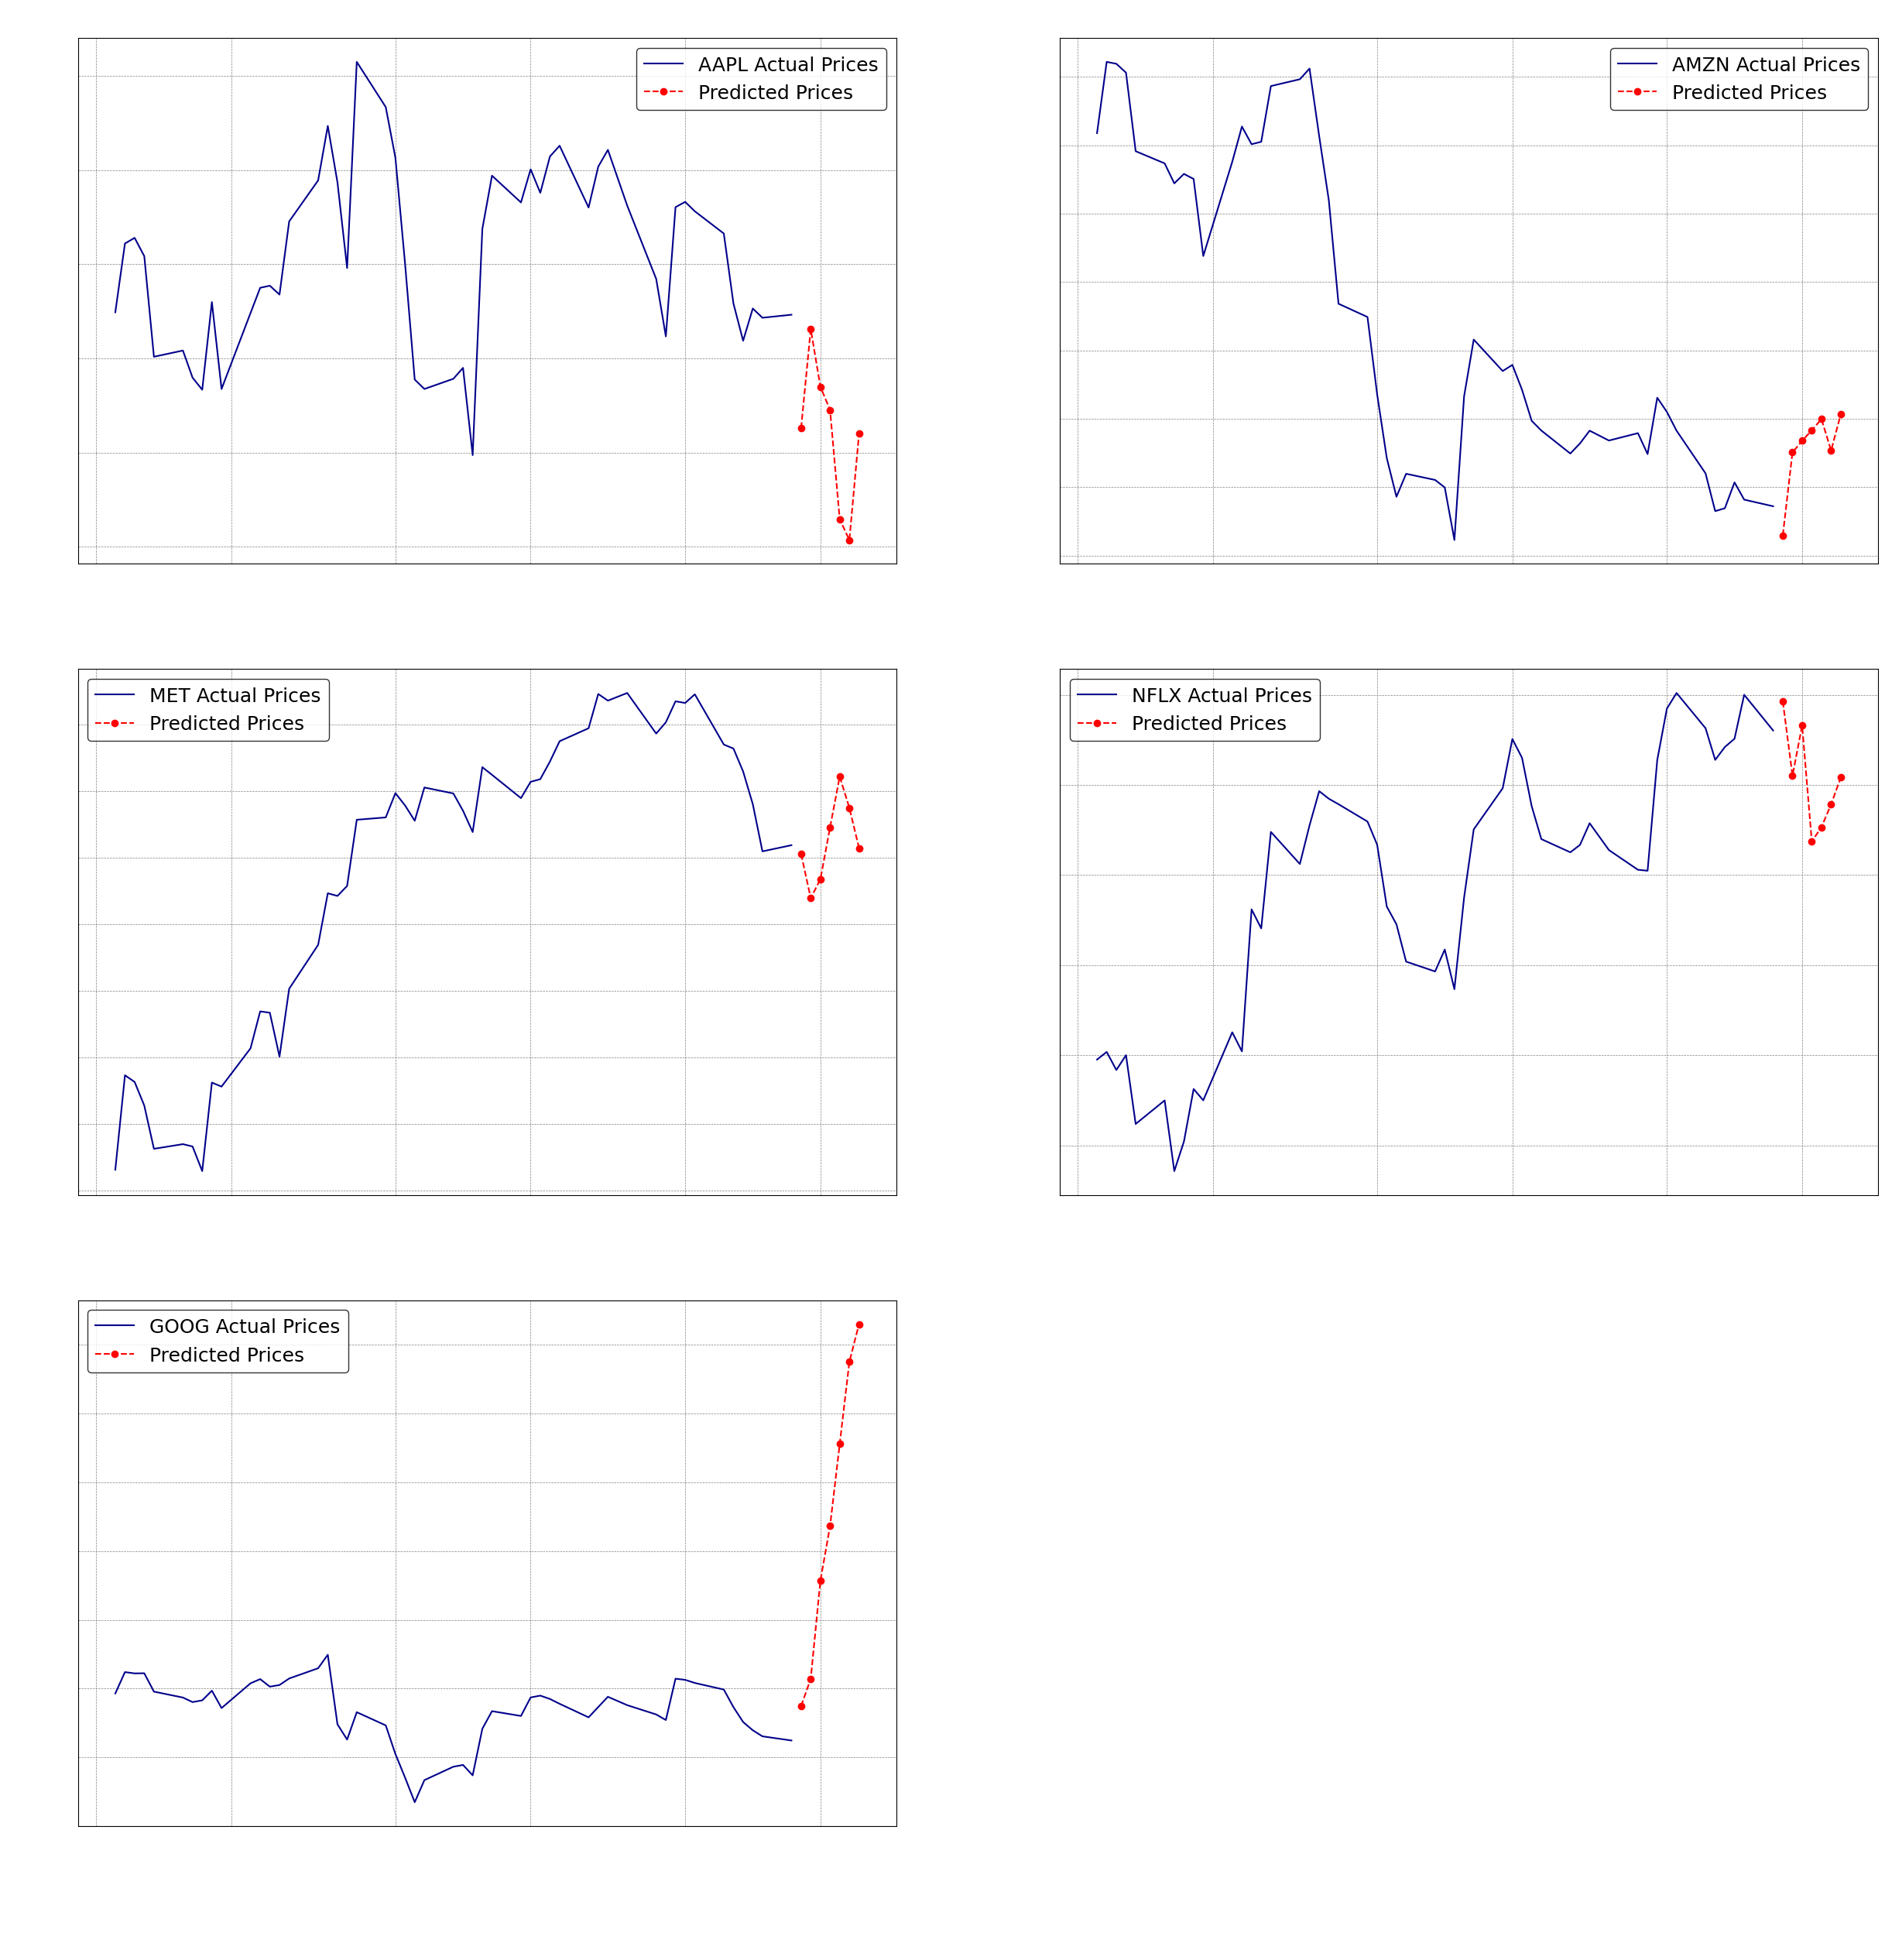

In [85]:
import matplotlib.pyplot as plt

def visualize_faang_forecast(future_predictions, stocks):
    # Setting the plot size
    fig, axes = plt.subplots(3, 2, figsize=(30, 30))
    
    # Remove the last empty subplot (since we have 5 stocks, not 6)
    fig.delaxes(axes[2][1])

    # Define stock tickers in order
    tickers = list(future_predictions.keys())
    
    # Color choices
    colors = {
        "MET": "darkblue",
        "AAPL": "darkblue",
        "AMZN": "darkblue",
        "NFLX": "darkblue",
        "GOOG": "darkblue",
        "PREDICTION": "red"
    }

    for i, ticker in enumerate(tickers):
        row, col = divmod(i, 2)  # Get subplot position

        # Set black background for each subplot
        axes[row][col].set_facecolor('white')

        # Get dates and prices for forecast
        dates = [pd.to_datetime(date, format='%d-%m-%Y') for date, _ in future_predictions[ticker]]
        prices = [price for _, price in future_predictions[ticker]]

        # Plot historical prices (last 50 days)
        historical_dates = stocks[ticker].index[-50:]
        historical_prices = stocks[ticker]['Close'].values[-50:]

        axes[row][col].plot(historical_dates, historical_prices, color=colors[ticker], label=f"{ticker} Actual Prices")
        axes[row][col].plot(dates, prices, linestyle='dashed', color=colors["PREDICTION"], marker='o', label="Predicted Prices")

        # Set title
        axes[row][col].set_title(f"{ticker} Stock Forecast", fontsize=30, color="white")

        # Set labels and tick colors
        axes[row][col].set_xlabel('Date', fontsize=20, color="white")
        axes[row][col].set_ylabel('Stock Price', fontsize=20, color="white")
        axes[row][col].tick_params(axis='x', colors='white', labelsize=18, rotation=45)
        axes[row][col].tick_params(axis='y', colors='white', labelsize=18)

        # Add grid
        axes[row][col].grid(color="gray", linestyle="--", linewidth=0.5)

        # Customize legend
        legend = axes[row][col].legend(facecolor="white", edgecolor="black", fontsize=18)
        for text in legend.get_texts():
            text.set_color("black")  # Make legend text white
    plt.savefig("gruforecast.png")
    plt.show()

# Call the function to visualize FAANG stock forecasts
visualize_faang_forecast(future_predictions, stocks)
